In [5]:
a=[0.25288643, 1.8149261 , 4.79943748, 0.54464834]

In [6]:
import numpy as np
np.sum(a)

7.41189835

In [7]:
[I 21:10:29.450 NotebookApp] Serving notebooks from local directory: C:\Users\vb
erlia
[I 21:10:29.450 NotebookApp] 0 active kernels
[I 21:10:29.450 NotebookApp] The Jupyter Notebook is running at: http://localhos
t:8888/?token=9cb920ca4b3b7a7f22b00458f4655b60f56f39a74dc657cc
[I 21:10:29.452 NotebookApp] Use Control-C to stop this server and shut down all
 kernels (twice to skip confirmation).
[C 21:10:29.457 NotebookApp]

    Copy/paste this URL into your browser when you connect for the first time,
    to login with a token:
        http://localhost:8888/?token=9cb920ca4b3b7a7f22b00458f4655b60f56f39a74dc
657cc
[I 21:10:29.660 NotebookApp] Accepting one-time-token-authenticated connection f
rom ::1
[I 21:11:27.877 NotebookApp] Kernel started: 01cd3797-1540-4f87-9a61-b96e1ad3d9a
b


1.8529745875

In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000
pd.set_option('display.max_colwidth', -1)
sys.path.insert(0, "C:\\Users\\vberlia\\Documents\\machine_learning")

In [3]:
from machineLearning.dataSummary import DataSummary
from machineLearning.visualizations import Visualization
from machineLearning.ploty_visualization import PlotlyVisualization
import plotly.plotly as py
from machineLearning.missingValues import MissingValue
from machineLearning.models import Model
from machineLearning.modelInputs import KNNInputs
from machineLearning.pipelines import Pipelines
from machineLearning.featureCreation import CreateMeanLookupFeature
from machineLearning.featureCreation import CreateMedianLookupFeature
from machineLearning.featureCreation import CreateFrequencyLookupFeature
from machineLearning.featureCreation import CreateOneHotEncoding
from machineLearning.featureCreation import CustomCutter
from machineLearning.featureCreation import IsMissingFeature
from machineLearning.missingValues import CustomQuantitativeImputer
from machineLearning.misc import Misc
from machineLearning.missingValues import CustomEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import ggplot
from ggplot import *
import numpy as np

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [4]:
application_train=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/application_train.csv")
# application_newData=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/application_test.csv")
# bureau=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/bureau.csv")
# bureau_balance=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/bureau_balance.csv")
# # credit_card_balance=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/credit_card_balance.csv")
home_credit_col_desc=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/HomeCredit_columns_description.csv",encoding = "ISO-8859-1")
# intall_payment=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/installments_payments.csv")
# pos_cash=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/POS_CASH_balance.csv")
# prev_app=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/previous_application.csv")
# sample_submi=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/sample_submission.csv")

In [22]:
train_sample=application_train.sample(10000,random_state=0)
train_sample=train_sample.reset_index()
original_index=train_sample['index']
train_sample=train_sample.drop('index',axis=1)
X=train_sample.values
Y=train_sample['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)
X_train=pd.DataFrame(X_train)
X_train.columns=train_sample.columns
X_test=pd.DataFrame(X_test)
X_test.columns=train_sample.columns

In [24]:
raw_columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT',
                    'AMT_ANNUITY','AMT_GOODS_PRICE',
                    'REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                    'DAYS_EMPLOYED','DAYS_REGISTRATION',
             'DAYS_ID_PUBLISH','OWN_CAR_AGE','HOUR_APPR_PROCESS_START',
            'DAYS_LAST_PHONE_CHANGE',
             'LIVINGAPARTMENTS_AVG',
             'AMT_REQ_CREDIT_BUREAU_DAY',
             'FLOORSMAX_MODE',
             'COMMONAREA_MEDI',
             'NONLIVINGAREA_AVG',
             'NONLIVINGAPARTMENTS_MODE',
             'ELEVATORS_MEDI',
             'COMMONAREA_MEDI',
             'FLOORSMAX_MODE',
             'YEARS_BUILD_MEDI',
             'APARTMENTS_MEDI',
             'NONLIVINGAREA_MEDI',
             'LANDAREA_MEDI',
             'NONLIVINGAPARTMENTS_MODE',
             'LIVINGAPARTMENTS_MODE',
             'YEARS_BUILD_MODE',
             'LANDAREA_MODE',
             'FLOORSMIN_AVG',
             'DEF_60_CNT_SOCIAL_CIRCLE',
             'OBS_60_CNT_SOCIAL_CIRCLE',
             'YEARS_BEGINEXPLUATATION_MODE',
             'NONLIVINGAPARTMENTS_MEDI',
             'NONLIVINGAREA_AVG',
             'YEARS_BUILD_MODE',
             'YEARS_BUILD_AVG',
             'AMT_REQ_CREDIT_BUREAU_YEAR',
             'APARTMENTS_MODE',
             'COMMONAREA_MODE',
             'LIVINGAREA_AVG',
             'EXT_SOURCE_2',
             'LANDAREA_AVG',
             'ENTRANCES_MODE',
             'FLOORSMAX_MEDI',
             'NONLIVINGAPARTMENTS_AVG',
             'APARTMENTS_AVG',
             'YEARS_BEGINEXPLUATATION_MEDI',
             'TOTALAREA_MODE',
             'EXT_SOURCE_3',
             'OBS_30_CNT_SOCIAL_CIRCLE',
             'BASEMENTAREA_AVG',
             'FLOORSMAX_MODE',
             'DEF_30_CNT_SOCIAL_CIRCLE',
             'FLOORSMIN_MODE',
             'LIVINGAPARTMENTS_MEDI',
             'BASEMENTAREA_MODE',
             'AMT_REQ_CREDIT_BUREAU_HOUR',
             'ELEVATORS_AVG',
             'ENTRANCES_MEDI',
             'LIVINGAREA_MODE',
             'EXT_SOURCE_1',
             'ENTRANCES_AVG',
             'FLOORSMIN_MEDI',
             'YEARS_BEGINEXPLUATATION_AVG',
             'FLOORSMAX_AVG',
             'CNT_FAM_MEMBERS',
             'BASEMENTAREA_MEDI',
             'LIVINGAREA_MEDI',
             'AMT_REQ_CREDIT_BUREAU_WEEK',
             'AMT_REQ_CREDIT_BUREAU_MON',
             'AMT_REQ_CREDIT_BUREAU_QRT',
             'ELEVATORS_MODE',
             'COMMONAREA_AVG',
             'NONLIVINGAREA_MODE',
             'BASEMENTAREA_AVG'
            ]
raw_columns=list(set(raw_columns))
miss_columns=raw_columns

In [76]:
from sklearn.preprocessing import Imputer
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

def create_dbscan_cluster(X,labels_true_col,eps=0.3,min_samples=10):
    data=X.copy()
    labels_true=X[labels_true_col]
    X=X.drop(labels_true_col,axis=1)

    imputer = Imputer(strategy="mean")
    X=imputer.fit_transform(X)

    X = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels=db.labels_    
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"
          % metrics.adjusted_mutual_info_score(labels_true, labels))
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))

    noise = np.ones_like(db.labels_)
    noise[db.core_sample_indices_] = 0
    a = pd.DataFrame(X)
    a.columns = data.columns[:-1]
    a['label']=labels_true
    a['noise']=noise
    a['cluster_labels']=db.labels_

    a['noise']=a['noise'].astype(str)
    a['label']=a['label'].astype(str)
    a['cluster_labels']=a['cluster_labels'].astype(str)

    print("Showing how the clusters are looking in the first two columns of input:\n")
    p1=ggplot(a, aes(x=data.columns[0], y=data.columns[1],color="cluster_labels",shape='noise')) + geom_point()
    return p1,db,a

In [69]:
imputer = Imputer(strategy="mean")
X_train_imputed=imputer.fit_transform(X_train[raw_columns])
X_train_imputed=pd.DataFrame(X_train_imputed)
X_train_imputed.columns=raw_columns
X_train_imputed['TARGET']=X_train['TARGET']

In [112]:
noisy_points=a[(a['cluster_labels']=='-1') & (a['label']=='0')].index

In [122]:
# Finding index removal list based on clus-bus algorithm
index_removal_list,candidate_clusters=clus_bus_algorithm(a)
bad_df=X_train.index.isin(index_removal_list)
X_train_CLUSBUS=X_train[~bad_df].reset_index().drop('index',axis=1)

In [360]:
bad_df

array([False, False, False, ..., False, False, False])

In [123]:
X_train_cleaned.shape

(8634, 122)

In [124]:
X_train_CLUSBUS.shape

(8770, 122)


Showing how the points are looking in the first two columns of input before clustering:



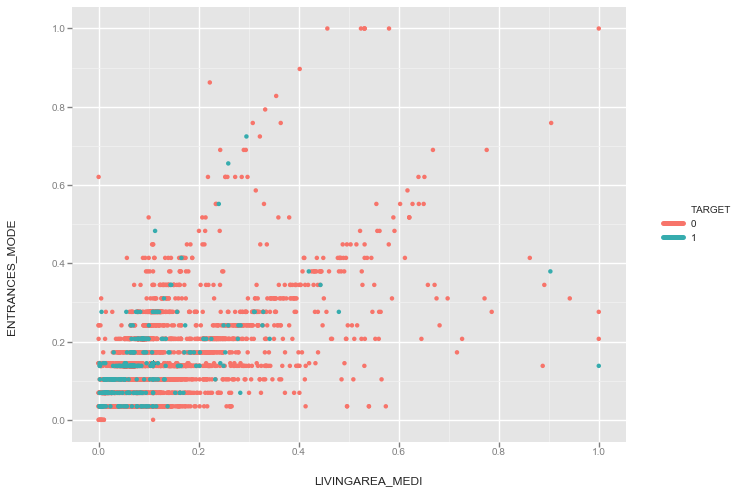

<ggplot: (54745313)>
Creating clusters

Homogeneity: 0.008
Completeness: 0.001
V-measure: 0.002
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.455

Showing how the clusters are looking in the first two columns of input:



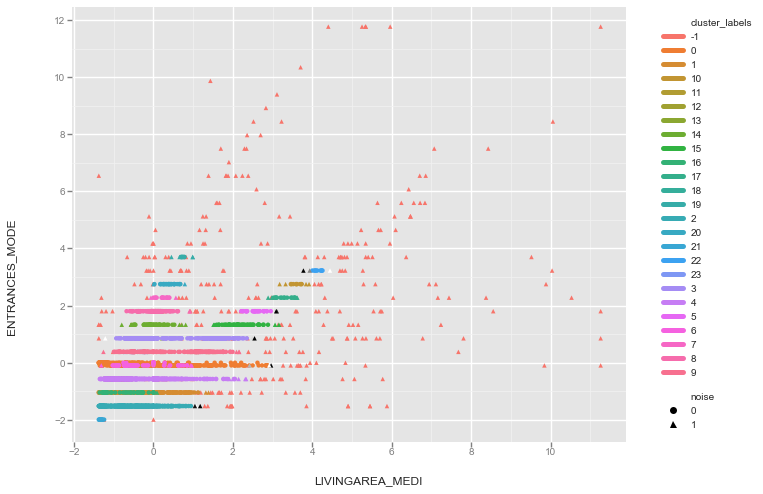

<ggplot: (-9223372036800500087)>
Showing plot after noise removal:



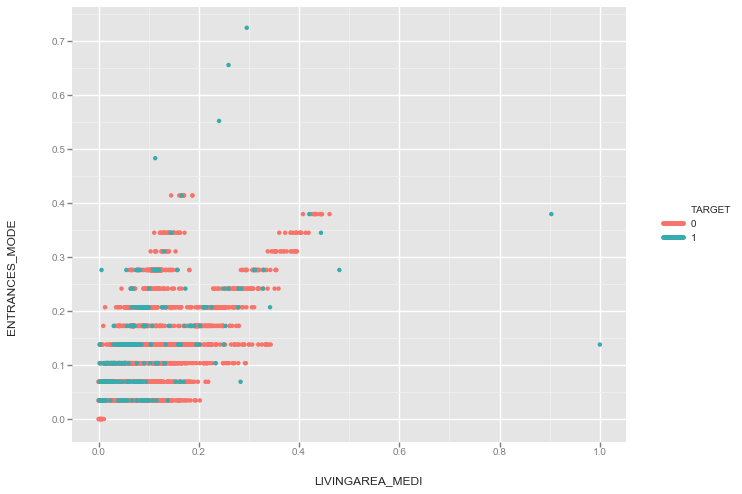

<ggplot: (-9223372036799513326)>
Showing plot after clus-bus:



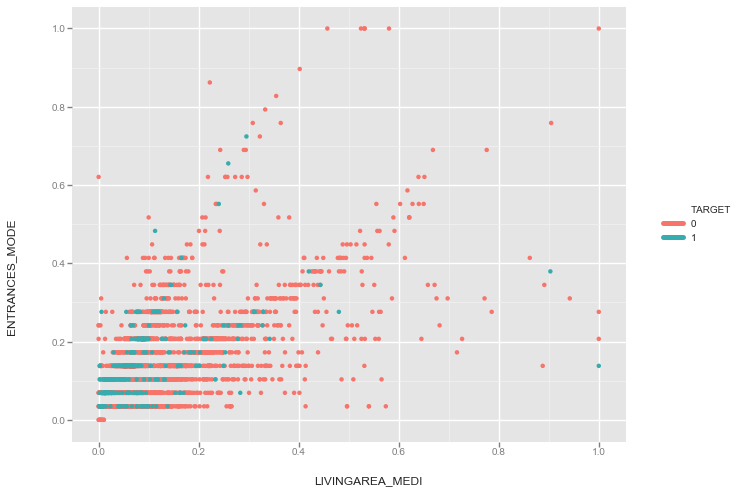

<ggplot: (54399082)>


In [127]:
print("\nShowing how the points are looking in the first two columns of input before clustering:\n")

p1=ggplot(X_train_imputed[['TARGET', raw_columns[0],raw_columns[1]]], aes(x=raw_columns[0], y=raw_columns[1],color='TARGET')) + geom_point()
print(p1)

print("Creating clusters\n")
cols=raw_columns[0:3]
cols.append('TARGET')
p1,db,a=create_dbscan_cluster(X_train[cols],'TARGET',eps=0.3)
print(p1)

noisy_points=a[(a['cluster_labels']=='-1') & (a['label']=='0')].index
bad_df = X_train.index.isin(noisy_points)
X_train_cleaned=X_train[~bad_df].reset_index().drop('index',axis=1)

print("Showing plot after noise removal:\n")

p1=ggplot(X_train_cleaned[['TARGET', raw_columns[0],raw_columns[1]]], aes(x=raw_columns[0], y=raw_columns[1],color='TARGET')) + geom_point()
print(p1)

# Finding index removal list based on clus-bus algorithm
index_removal_list,candidate_clusters=clus_bus_algorithm(a)
bad_df=X_train.index.isin(index_removal_list)
X_train_CLUSBUS=X_train[~bad_df].reset_index().drop('index',axis=1)

print("Showing plot after clus-bus:\n")

p1=ggplot(X_train_CLUSBUS[['TARGET', raw_columns[0],raw_columns[1]]], aes(x=raw_columns[0], y=raw_columns[1],color='TARGET')) + geom_point()
print(p1)

# cols=raw_columns[0:3]
# cols.append('TARGET')
# p1,db,a=create_dbscan_cluster(X_train_cleaned[cols],'TARGET',eps=0.3)
# p1

In [115]:
def clus_bus_algorithm(clustered_dataframe,epsilon=0.1,percent_minority_class=0.5):
    cluster_vs_loan_issues = pd.crosstab(index=clustered_dataframe["cluster_labels"], 
                           columns=clustered_dataframe["label"])
    cluster_vs_loan_issues['cluster_total']=cluster_vs_loan_issues.sum(axis=1).values
    cluster_vs_loan_issues['label_0_ratio']=cluster_vs_loan_issues['0']/cluster_vs_loan_issues['cluster_total']
    cluster_vs_loan_issues['label_1_ratio']=cluster_vs_loan_issues['1']/cluster_vs_loan_issues['cluster_total']
    candidate_clusters=list(cluster_vs_loan_issues[cluster_vs_loan_issues['label_1_ratio']>epsilon].index)
        
    index_removal_list=[]
    for candidate in candidate_clusters:
        indexes=list(a[(a['cluster_labels']==candidate) & (a['label']=='0')].index)
        sample_indexes=random.sample(indexes,int(len(indexes)*percent_minority_class))
        index_removal_list.extend(sample_indexes)
    return index_removal_list,candidate_clusters    

In [111]:
a[(a['cluster_labels']=='-1') & (a['label']=='0')]

,LIVINGAREA_MEDI,ENTRANCES_MODE,DEF_60_CNT_SOCIAL_CIRCLE,label,noise,cluster_labels
13,4.220156e+00,2.753070e+00,-0.283647,0,1,-1
33,1.929516e+00,-1.516032e+00,-0.283647,0,1,-1
58,3.843129e-01,3.702371e+00,2.562662,0,1,-1
64,4.872097e+00,8.558445e-01,-0.283647,0,1,-1
116,5.709767e+00,1.805145e+00,-0.283647,0,1,-1
147,3.812679e-02,3.702371e+00,-0.283647,0,1,-1
182,5.721138e+00,4.651672e+00,-0.283647,0,1,-1
187,5.613744e+00,8.558445e-01,-0.283647,0,1,-1
208,2.016694e+00,8.558445e-01,2.562662,0,1,-1
213,6.155247e-01,-9.345631e-02,5.408970,0,1,-1


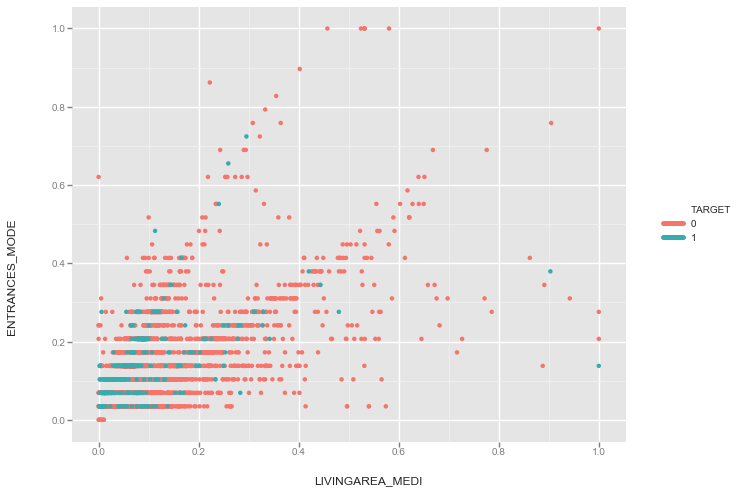

<ggplot: (54805042)>


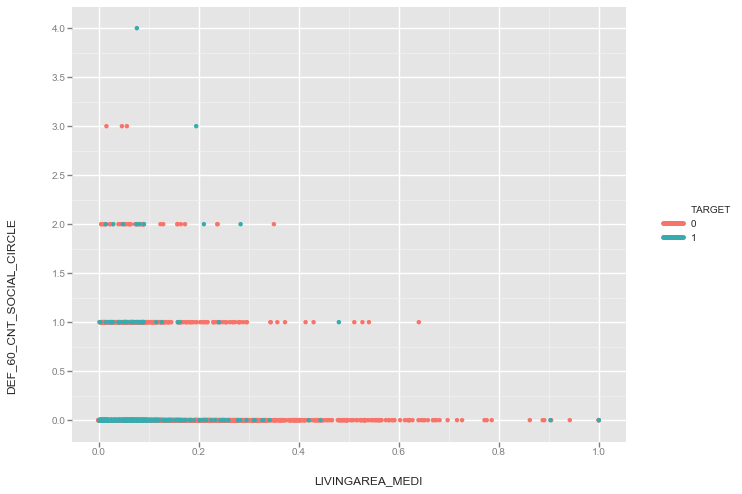

<ggplot: (-9223372036800451903)>


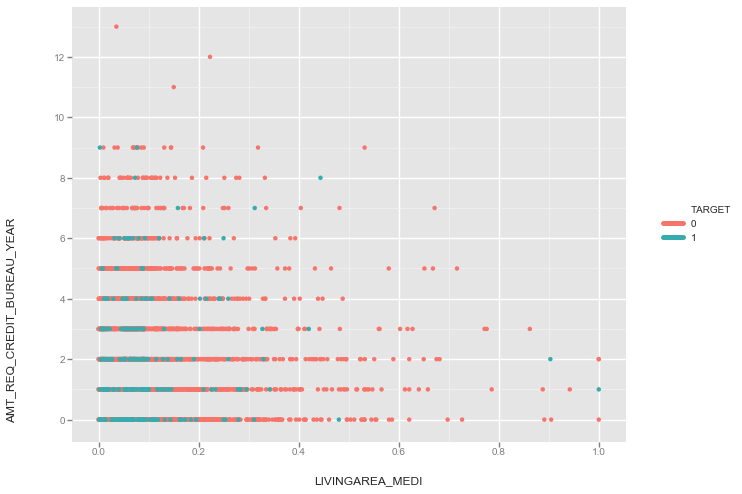

<ggplot: (-9223372036800174406)>


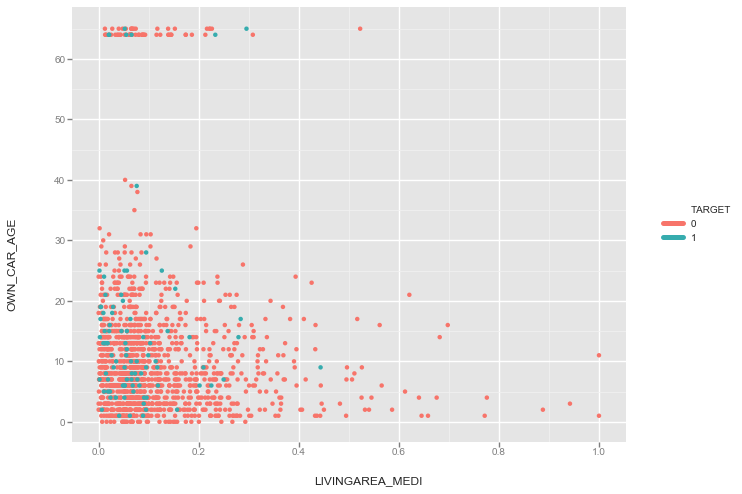

<ggplot: (53912026)>


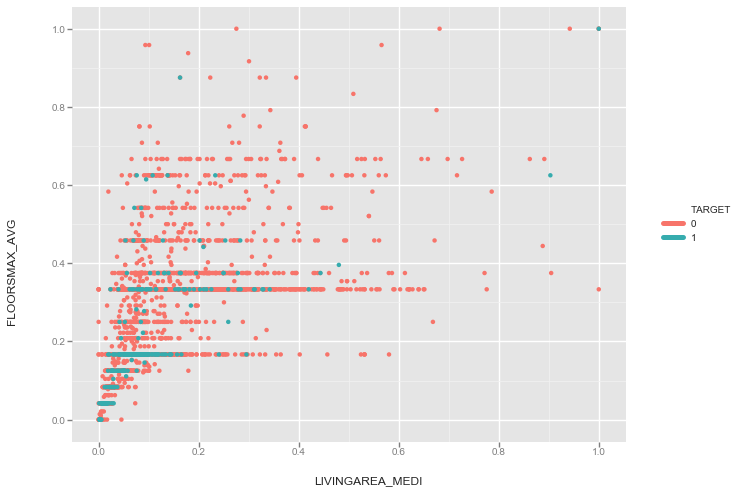

<ggplot: (54090493)>


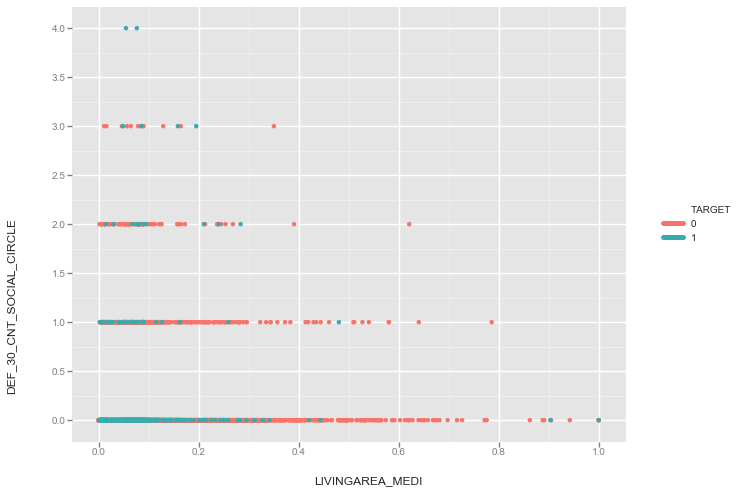

<ggplot: (53413275)>


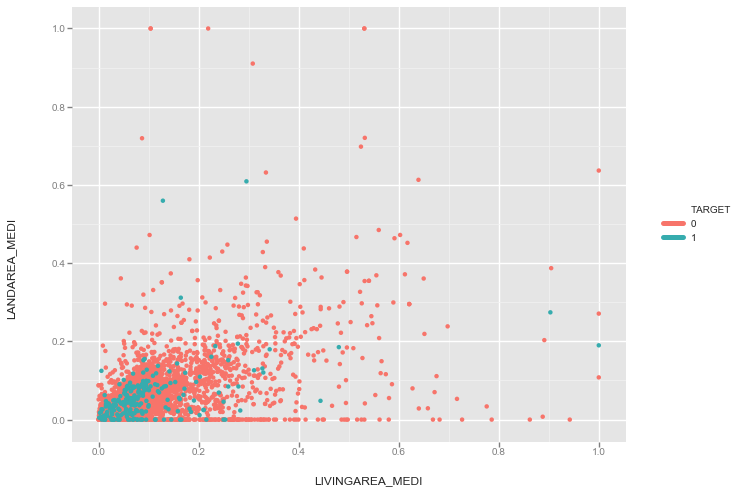

<ggplot: (54530778)>


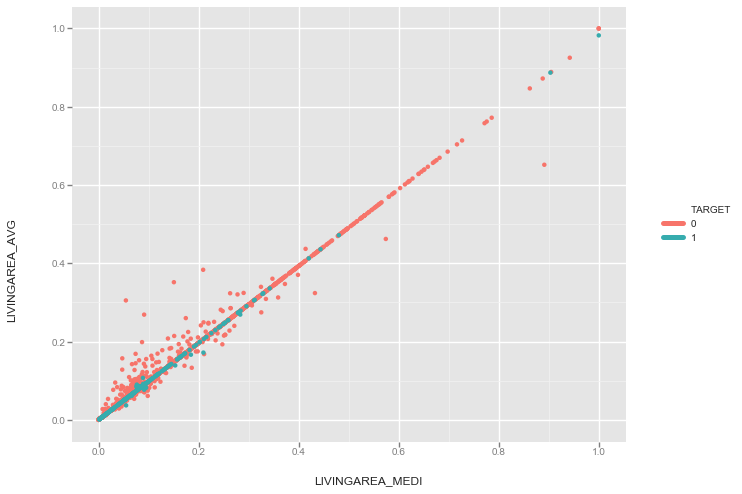

<ggplot: (53999322)>


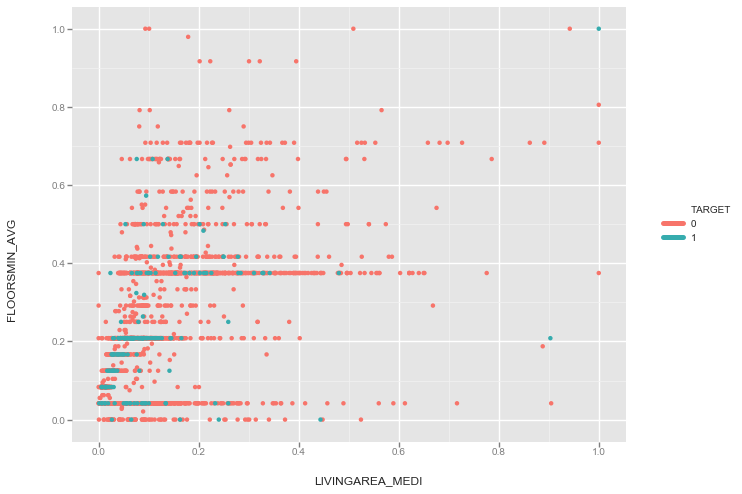

<ggplot: (54785607)>


In [47]:
"""
Original plots of few columns
"""

b=raw_columns[0:10]
for i in range(1,len(b)):
    p1=ggplot(X_train[['TARGET', raw_columns[0],raw_columns[i]]].dropna(), aes(x=raw_columns[0], y=raw_columns[i],color='TARGET')) + geom_point()
    print(p1)

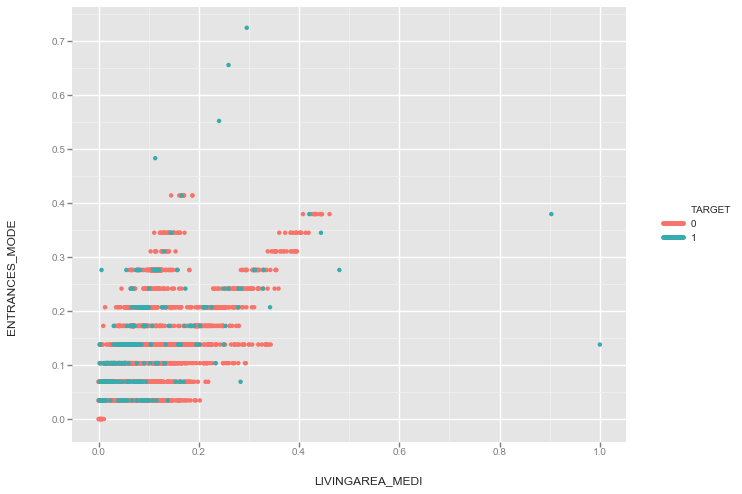

<ggplot: (-9223372036800201668)>


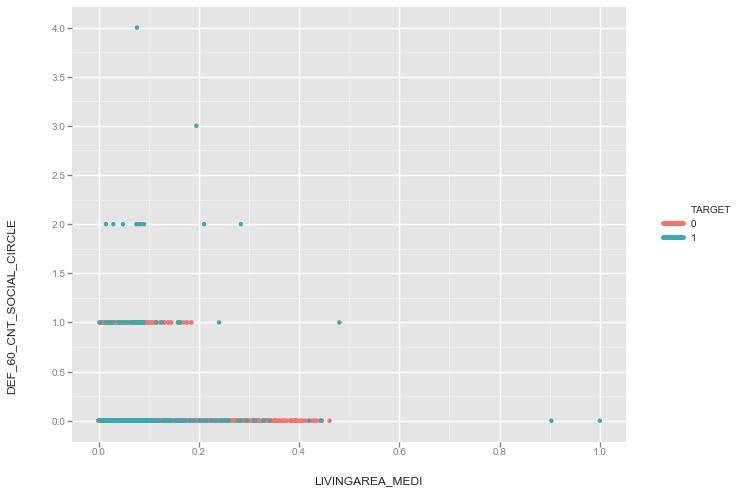

<ggplot: (54592022)>


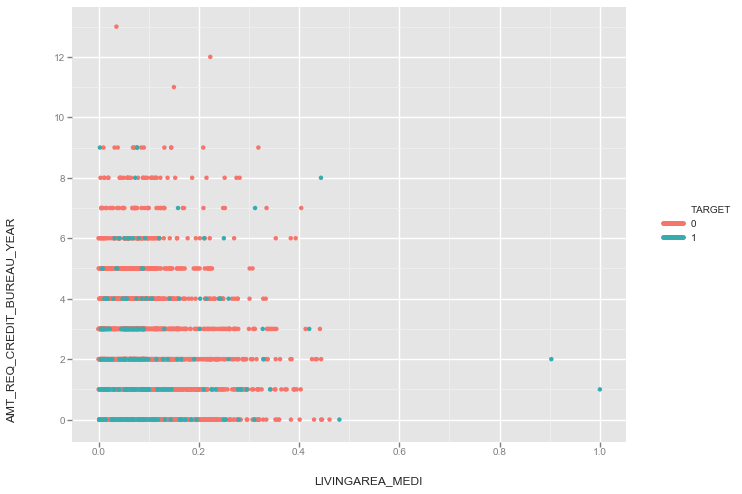

<ggplot: (-9223372036800049846)>


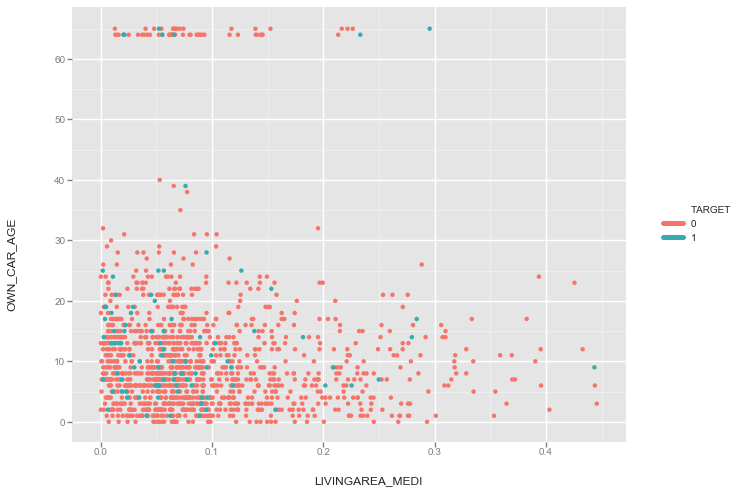

<ggplot: (54252829)>


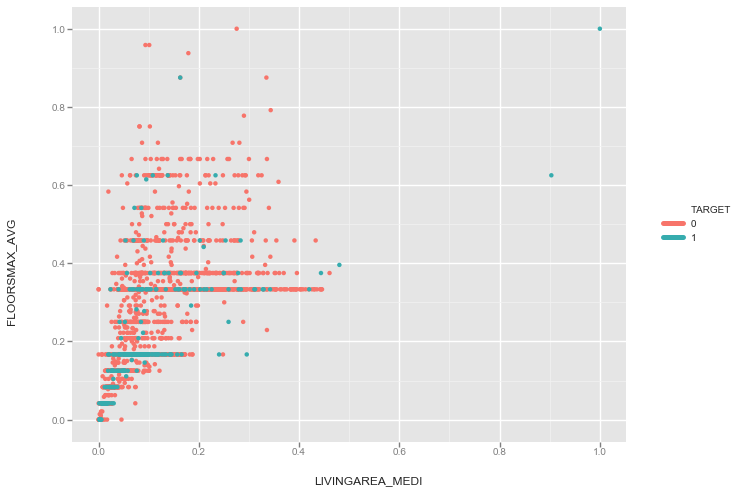

<ggplot: (55786518)>


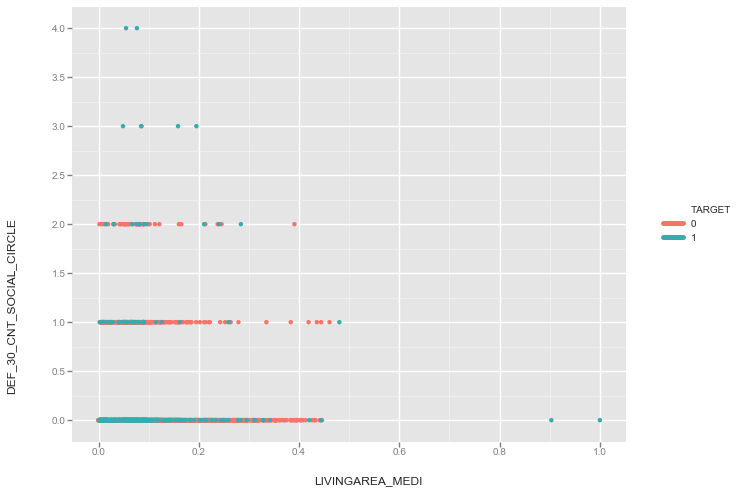

<ggplot: (-9223372036799254510)>


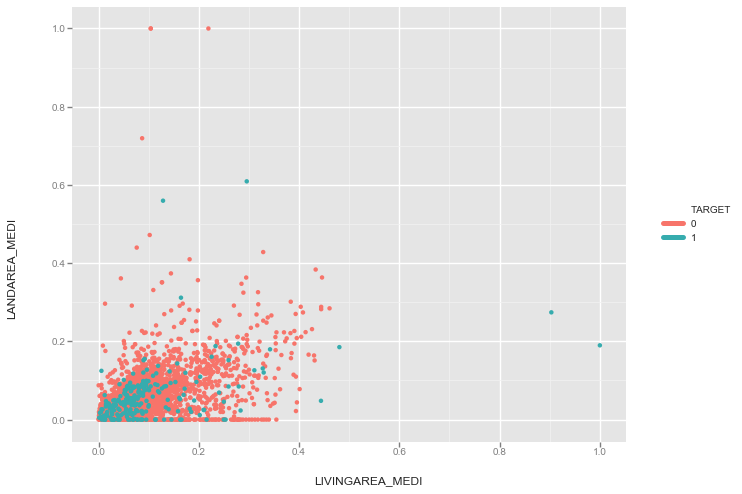

<ggplot: (-9223372036799587268)>


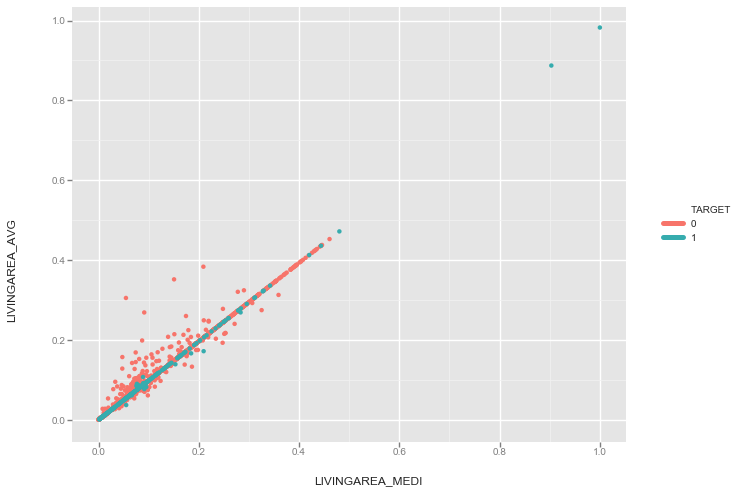

<ggplot: (-9223372036800802595)>


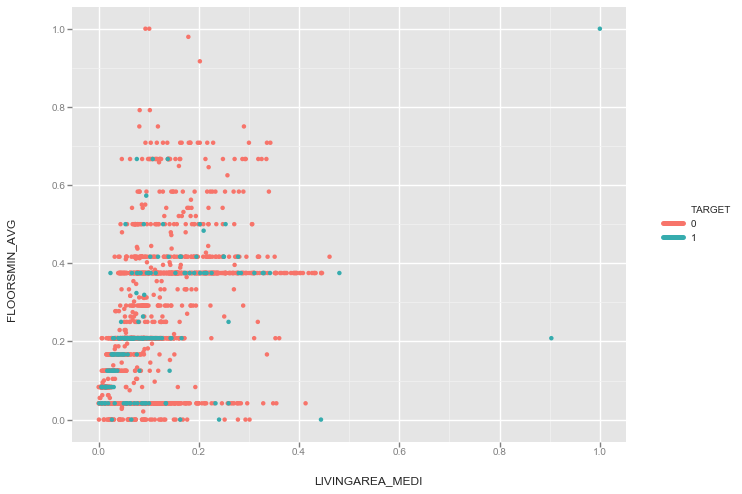

<ggplot: (54366114)>


In [77]:
"""
Watching the effect of noise removal on few columns
"""

b=raw_columns[0:10]
for i in range(1,len(b)):
    p1=ggplot(X_train_cleaned[['TARGET', raw_columns[0],raw_columns[i]]].dropna(), aes(x=raw_columns[0], y=raw_columns[i],color='TARGET')) + geom_point()
    print(p1)

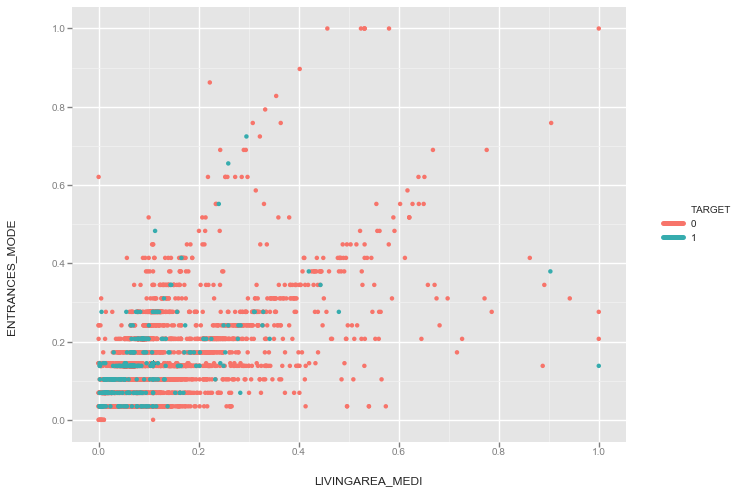

<ggplot: (55794657)>


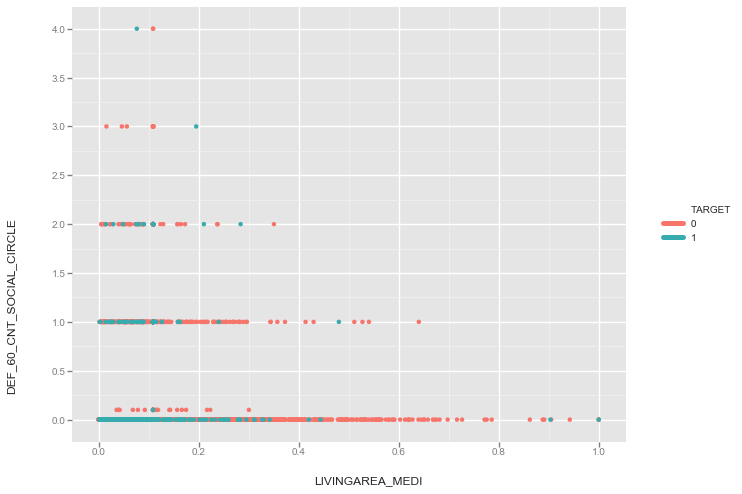

<ggplot: (55458126)>


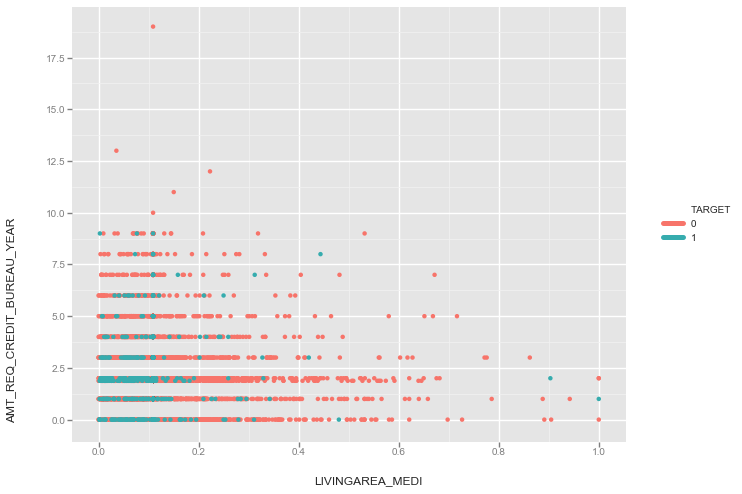

<ggplot: (55469295)>


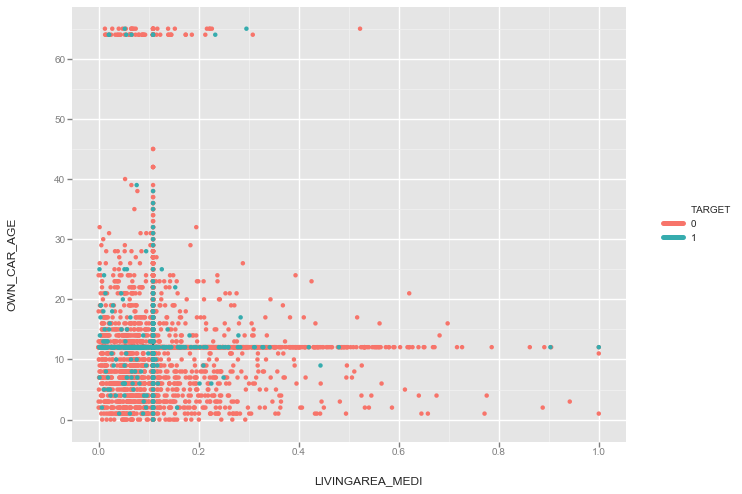

<ggplot: (-9223372036800418465)>


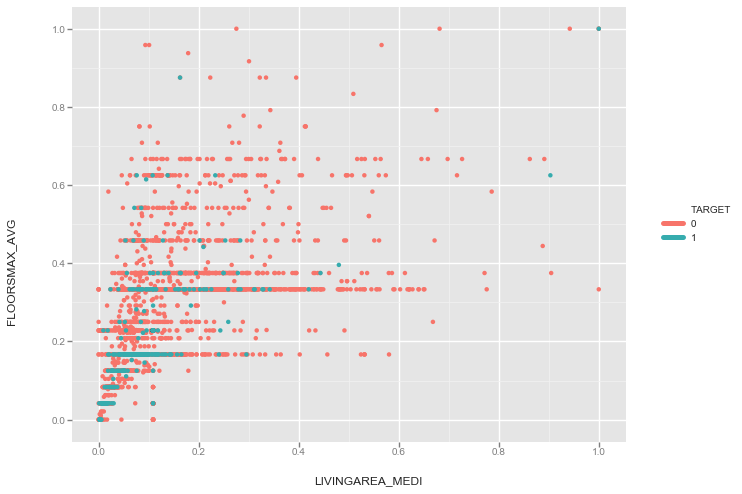

<ggplot: (-9223372036799337023)>


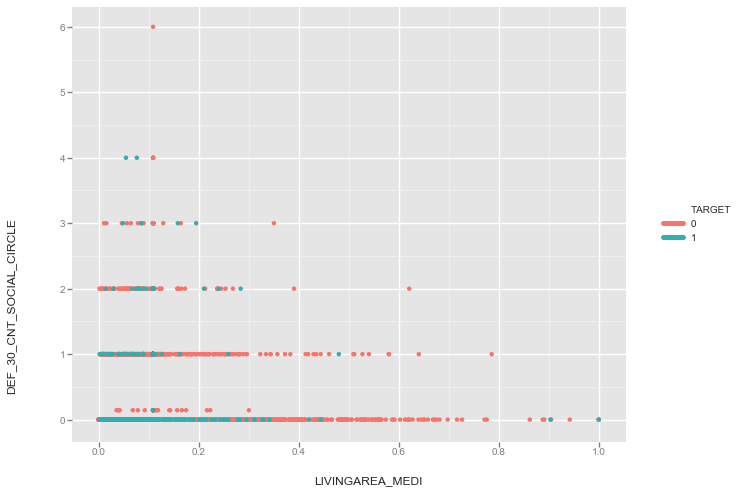

<ggplot: (55290744)>


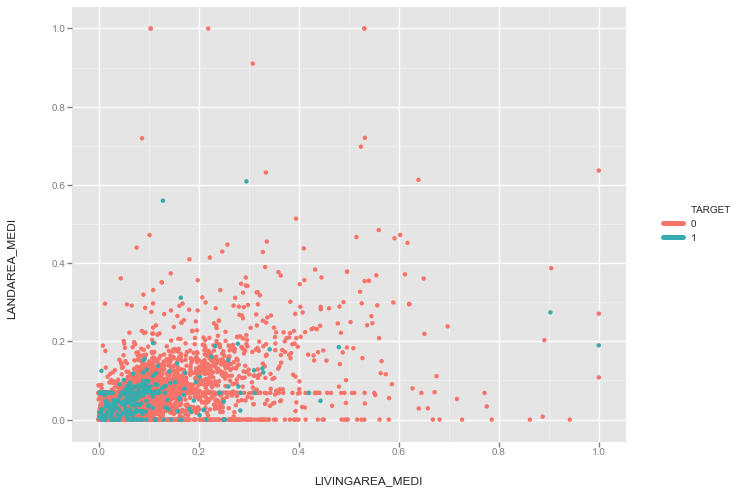

<ggplot: (-9223372036799305107)>


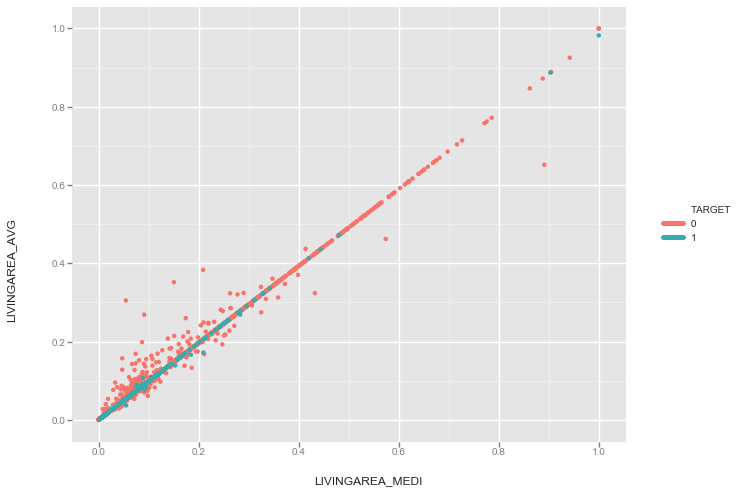

<ggplot: (55483284)>


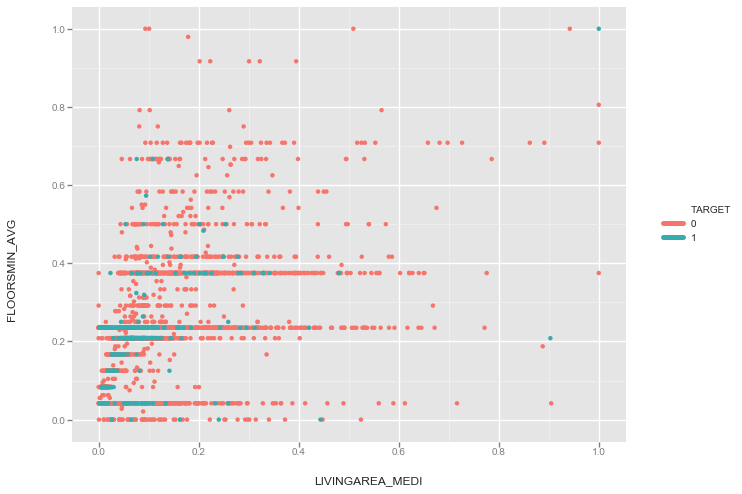

<ggplot: (-9223372036799297406)>


In [136]:
"""
Original plots of few columns
"""

b=raw_columns[0:10]
for i in range(1,len(b)):
    p1=ggplot(X_train_imputed[['TARGET', raw_columns[0],raw_columns[i]]], aes(x=raw_columns[0], y=raw_columns[i],color='TARGET')) + geom_point()
    print(p1)

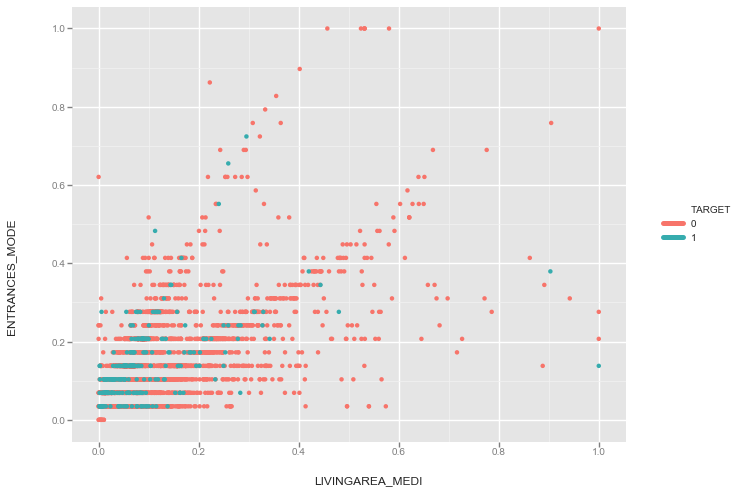

<ggplot: (55442752)>


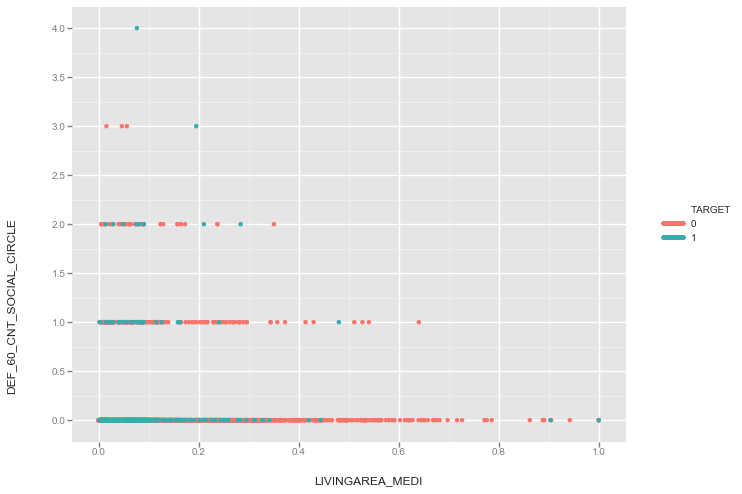

<ggplot: (54615076)>


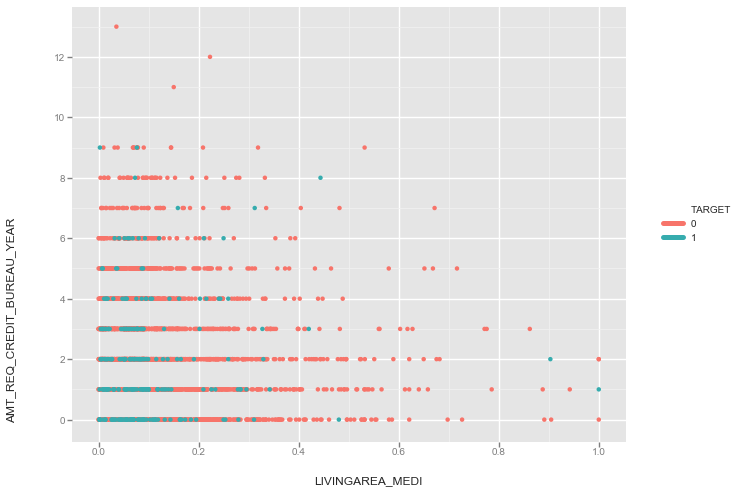

<ggplot: (54481591)>


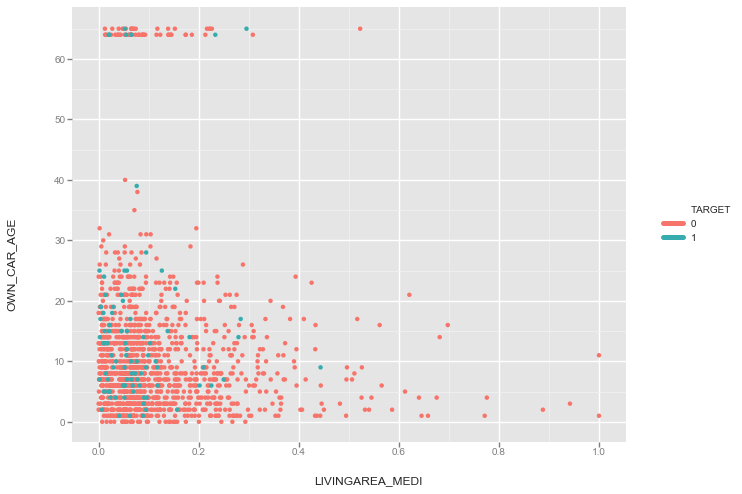

<ggplot: (-9223372036800170773)>


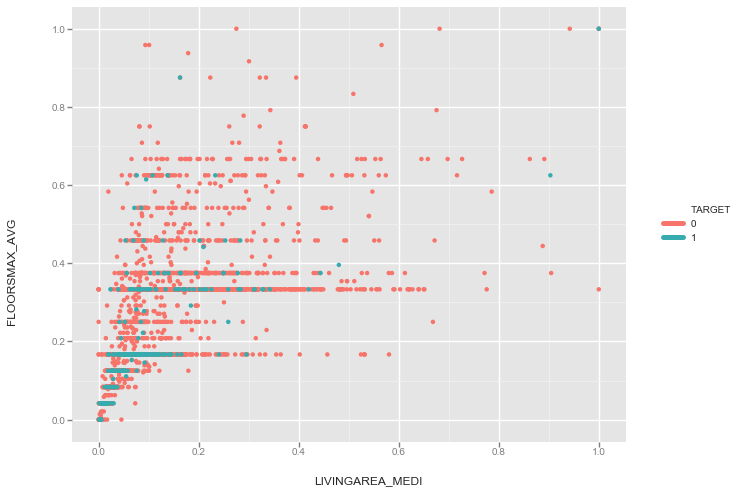

<ggplot: (-9223372036800298082)>


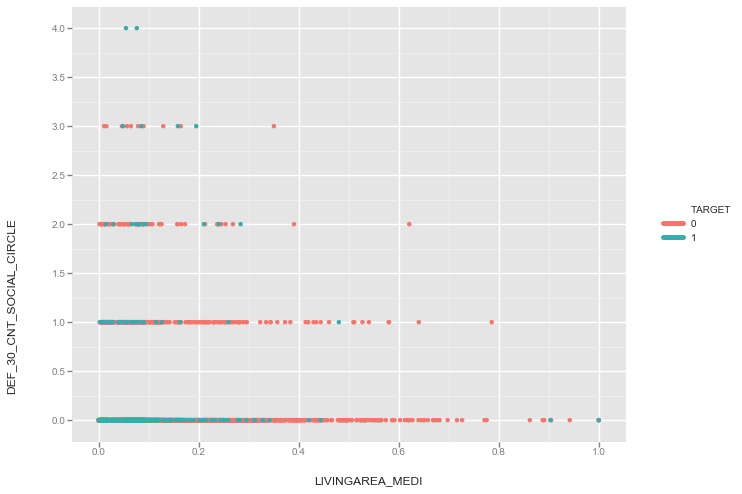

<ggplot: (-9223372036799482680)>


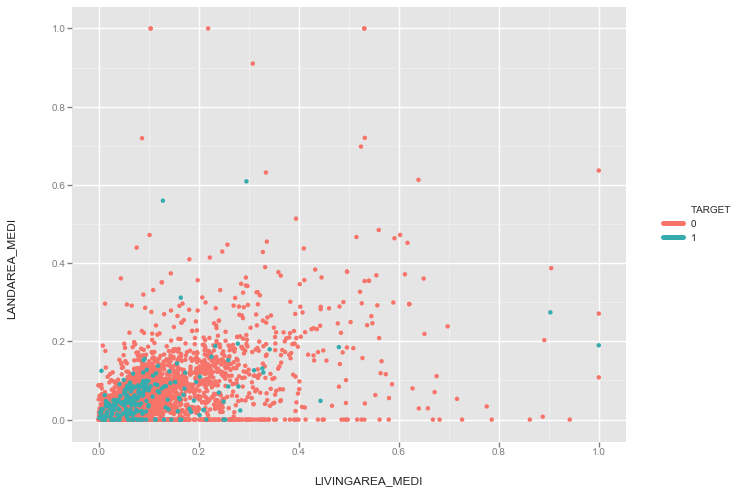

<ggplot: (-9223372036800411623)>


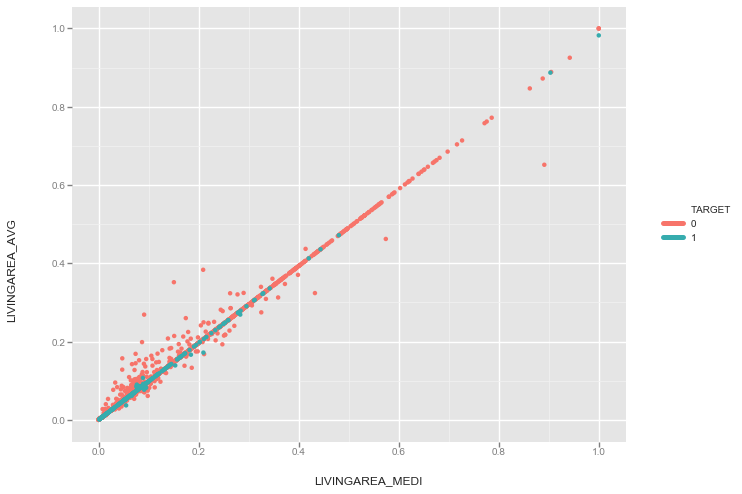

<ggplot: (55472150)>


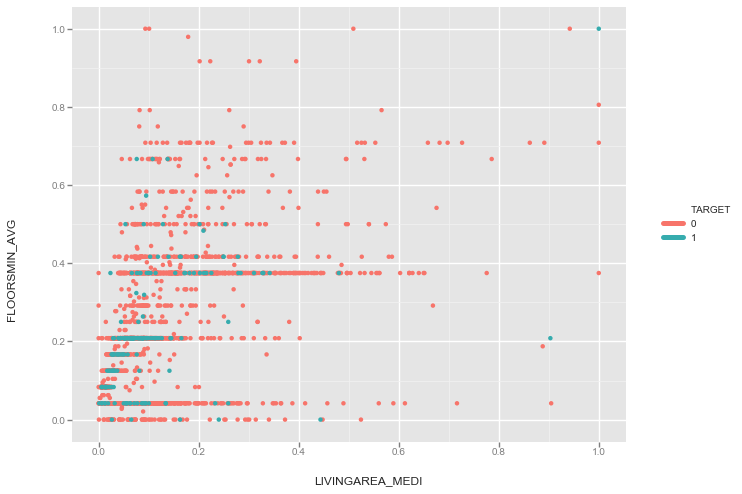

<ggplot: (55438228)>


In [137]:
"""
Watching the effect of clus-bus on few columns
"""

b=raw_columns[0:10]
for i in range(1,len(b)):
    p1=ggplot(X_train_CLUSBUS[['TARGET', raw_columns[0],raw_columns[i]]], aes(x=raw_columns[0], y=raw_columns[i],color='TARGET')) + geom_point()
    print(p1)

In [145]:
index_removal_list,candidate_clusters=clus_bus_algorithm(a,epsilon=0.07,percent_minority_class=1)
noisy_points=a[(a['cluster_labels']=='-1') & (a['label']=='0')].index
index_removal_list.extend(noisy_points)

In [150]:
len(index_removal_list)

3719

In [309]:
len(index_removal_list)

3719

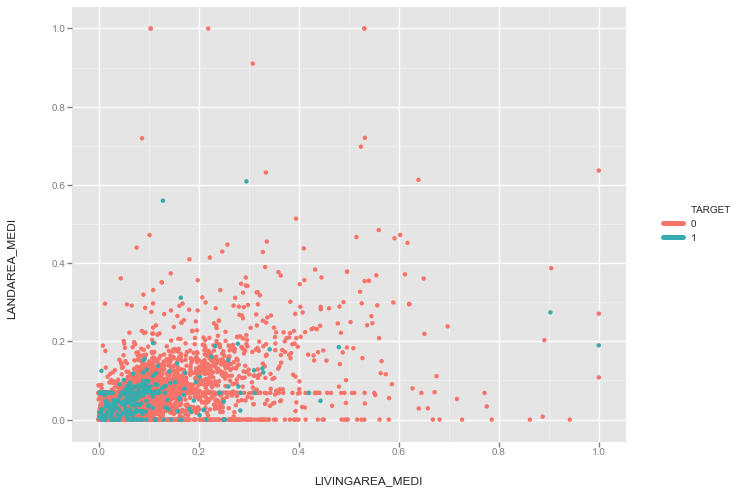

<ggplot: (55521533)>


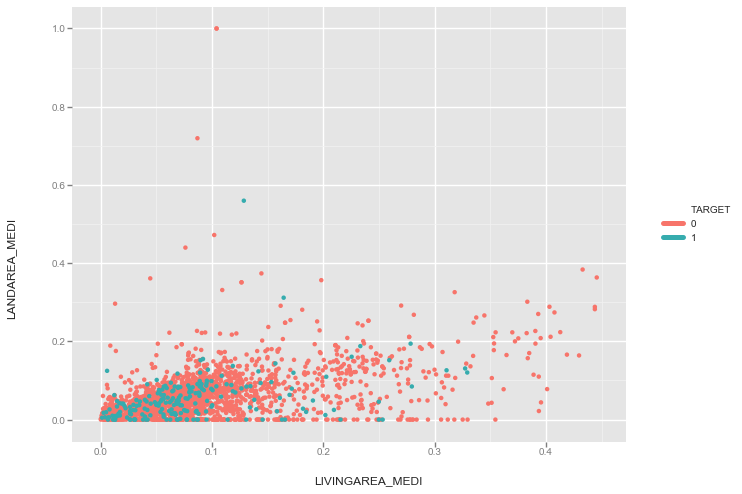

<ggplot: (54319396)>


In [149]:
"""
Watching the effect of clus bus on first two columns
There is a minute different visible in the bottom of the graph where few cluter of minority class 
has been reduced.
"""

index_removal_list,candidate_clusters=clus_bus_algorithm(a,epsilon=0.07,percent_minority_class=0.5)
# noisy_points=a[(a['cluster_labels']=='-1') & (a['label']=='0')].index
noisy_points=a[(a['cluster_labels']=='-1')].index
index_removal_list.extend(noisy_points)

bad_df=X_train.index.isin(index_removal_list)
X_train_CLUSBUS=X_train[~bad_df].reset_index().drop('index',axis=1)

p1=ggplot(X_train_imputed[['TARGET', raw_columns[0],raw_columns[7]]], aes(x=raw_columns[0], y=raw_columns[7],color='TARGET')) + geom_point()
print(p1)

p1=ggplot(X_train_CLUSBUS[['TARGET', raw_columns[0],raw_columns[7]]], aes(x=raw_columns[0], y=raw_columns[7],color='TARGET')) + geom_point()
print(p1)

Before noise removal



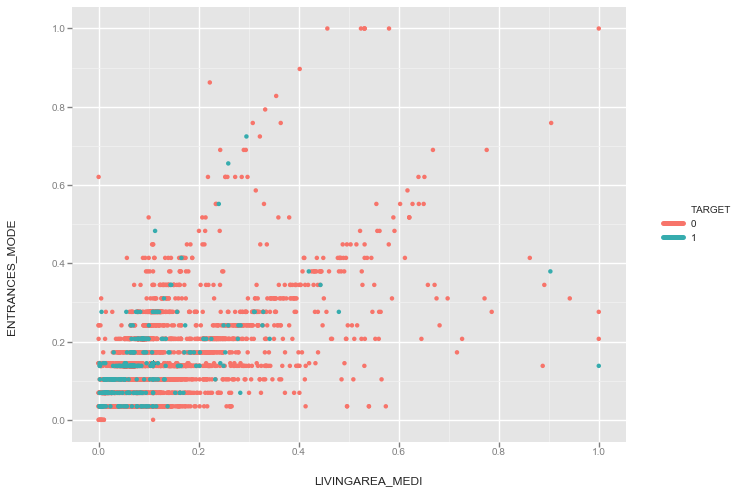

<ggplot: (-9223372036799658173)>
After noise removal



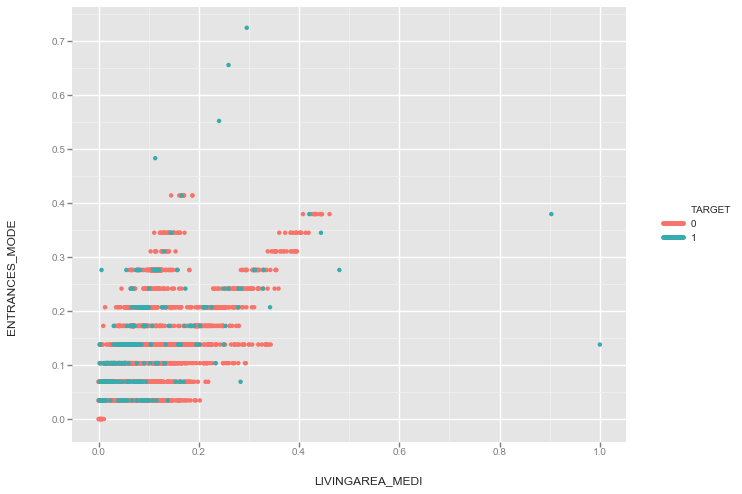

<ggplot: (54292572)>


In [78]:
print("Before noise removal\n")

p1=ggplot(X_train_imputed[['TARGET', raw_columns[0],raw_columns[1]]], aes(x=raw_columns[0], y=raw_columns[1],color='TARGET')) + geom_point()
print(p1)

print("After noise removal\n")

p1=ggplot(X_train_cleaned[['TARGET', raw_columns[0],raw_columns[1]]].dropna(), aes(x=raw_columns[0], y=raw_columns[1],color='TARGET')) + geom_point()
print(p1)


In [308]:
build_model(X_train_cleaned)

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



Logistic Regression accuracy on test set of 1000 points: 0.6830
This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[624 286]
 [ 31  59]]

Auc Score: 0.7361294261294261

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.69      0.80       910
          1       0.17      0.66      0.27        90

avg / total       0.88      0.68      0.75      1000



In [307]:
build_model(X_train_CLUSBUS)

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



Logistic Regression accuracy on test set of 1000 points: 0.6790
This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[623 287]
 [ 34  56]]

Auc Score: 0.7209890109890109

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.68      0.80       910
          1       0.16      0.62      0.26        90

avg / total       0.88      0.68      0.75      1000



In [244]:
build_model(X_train,1)

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



Logistic Regression accuracy on test set of 1000 points: 0.6890
This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[629 281]
 [ 30  60]]

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.69      0.80       910
          1       0.18      0.67      0.28        90

avg / total       0.88      0.69      0.75      1000



In [304]:
build_model(X_train,1)

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



Logistic Regression accuracy on test set of 1000 points: 0.6830
This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[626 284]
 [ 33  57]]

Auc Score: 0.7274236874236876

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.69      0.80       910
          1       0.17      0.63      0.26        90

avg / total       0.88      0.68      0.75      1000



In [214]:
DataSummary.returnSummaryDataFrame(X_train[['OCCUPATION_TYPE','AMT_INCOME_TOTAL']])

,AMT_INCOME_TOTAL,OCCUPATION_TYPE
col_type,float64,object
count_unique,269,18
unique_values,[180000.0 121500.0 112500.0 45000.0 225000.0 126000.0 90000.0 144000.0\n 202500.0 157500.0 67500.0 135000.0 103500.0 147150.0 247500.0 315000.0\n 54000.0 337500.0 78750.0 630000.0 162000.0 153607.5 81000.0 85500.0\n 101250.0 270000.0 94500.0 382500.0 720000.0 360000.0 234000.0 117000.0\n 292500.0 193500.0 72000.0 139500.0 450000.0 166500.0 96750.0 216000.0\n 261000.0 252000.0 99000.0 108000.0 76500.0 159750.0 274500.0 130500.0\n 142992.0 69750.0 675000.0 189000.0 99450.0 243000.0 171000.0 173088.0\n 283500.0 148500.0 229500.0 175500.0 1575000.0 58500.0 153000.0 190440.0\n 540000.0 103230.0 105840.0 256500.0 137821.5 31500.0 72900.0 47250.0\n 405000.0 110250.0 198000.0 63000.0 423000.0 238500.0 207000.0 184500.0\n 342000.0 265500.0 211500.0 1125000.0 90810.0 227250.0 186750.0 40500.0\n 585000.0 209250.0 38250.0 150750.0 258750.0 56250.0 119250.0 301500.0\n 105750.0 138288.15 75550.5 121900.5 232200.0 306000.0 328500.0 132750.0\n 74250.0 77539.5 155250.0 263281.5 42750.0 391500.0 143100.0 74700.0\n 427500.0 49500.0 100350.0 279000.0 346500.0 318906.0 418500.0 648000.0\n 234900.0 81751.5 378000.0 414000.0 1417500.0 55350.0 324000.0 29700.0\n 134248.5 164250.0 173250.0 495000.0 98433.0 77850.0 810000.0 126900.0\n 1035000.0 436500.0 224100.0 157707.0 351000.0 263250.0 220500.0 51750.0\n 101362.5 48600.0 288000.0 52650.0 256050.0 65250.0 310500.0 240750.0\n 247675.5 27000.0 36000.0 87750.0 87300.0 105300.0 83700.0 117553.5\n 80100.0 85918.5 900000.0 252900.0 124200.0 409500.0 162900.0 100566.0\n 32850.0 123750.0 472500.0 165600.0 221400.0 144742.5 96835.5 83250.0\n 77400.0 364500.0 257850.0 141727.5 161550.0 161244.0 1350000.0 146659.5\n 245250.0 320400.0 385200.0 400500.0 319500.0 60750.0 99328.5 50400.0\n 562500.0 459751.5 517500.0 75150.0 312750.0 203400.0 153729.0 140400.0\n 269613.0 102780.0 99283.5 28350.0 96579.0 73350.0 236250.0 411300.0\n 89100.0 396000.0 84600.0 117423.0 69246.0 441000.0 507739.5 343350.0\n 112608.0 117450.0 612000.0 191250.0 159300.0 160200.0 82800.0 297000.0\n 79200.0 146997.0 102600.0 558000.0 130950.0 281250.0 188667.0 146700.0\n 83304.0 369000.0 145800.0 27900.0 157950.0 152415.0 481500.0 36900.0\n 359100.0 86850.0 128700.0 77647.5 349938.0 486000.0 156600.0 75600.0\n 39600.0 171900.0 157905.0 387000.0 195750.0 61650.0 84150.0 324805.5\n 79650.0 105120.0 128250.0 44100.0 78916.5 111600.0 33750.0 170100.0\n 37800.0 218250.0 47191.5 70200.0 86116.5],['Core staff' 'Accountants' 'Waiters/barmen staff' 'Private service staff'\n 'Laborers' 'High skill tech staff' nan 'Sales staff' 'Low-skill Laborers'\n 'HR staff' 'Drivers' 'Managers' 'Medicine staff' 'Security staff'\n 'Cleaning staff' 'Secretaries' 'Cooking staff' 'Realty agents' 'IT staff']
missing_count,0,2792
count,9000,NaN
mean,168652,NaN
std,96169.2,NaN
min,27000,NaN
25%,112500,NaN
50%(median),148500,NaN


In [249]:
one_hot_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
'FLAG_OWN_REALTY','OCCUPATION_TYPE','ORGANIZATION_TYPE',]
X_train[one_hot_columns]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Cash loans,F,N,N,Core staff,Business Entity Type 1
1,Cash loans,F,Y,N,Accountants,Kindergarten
2,Cash loans,F,Y,Y,Waiters/barmen staff,Business Entity Type 3
3,Cash loans,F,N,Y,Private service staff,Culture
4,Cash loans,F,N,Y,Accountants,Business Entity Type 3
5,Cash loans,M,N,Y,Core staff,Police
6,Revolving loans,F,N,Y,Laborers,Transport: type 4
7,Cash loans,F,N,Y,High skill tech staff,Business Entity Type 3
8,Cash loans,F,N,Y,Core staff,Kindergarten
9,Cash loans,F,N,N,NaN,XNA


In [303]:
freq_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
'FLAG_OWN_REALTY','CNT_CHILDREN','NAME_TYPE_SUITE',
'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
  'WALLSMATERIAL_MODE',
 'FONDKAPREMONT_MODE',
 'OCCUPATION_TYPE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_WORK_REGION',
  'REGION_RATING_CLIENT',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION'
  ]

tmp_removal=['EMERGENCYSTATE_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'WALLSMATERIAL_MODE']

freq_columns=list(set(freq_columns)-set(tmp_removal))

one_hot_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
'FLAG_OWN_REALTY','NAME_TYPE_SUITE',
'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
'FLAG_MOBIL',
 'NAME_INCOME_TYPE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
  'WALLSMATERIAL_MODE',
 'FONDKAPREMONT_MODE',
 'OCCUPATION_TYPE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
    'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_WORK_REGION',
  'REGION_RATING_CLIENT',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
    'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY'
]

one_hot_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
'FLAG_OWN_REALTY','OCCUPATION_TYPE','ORGANIZATION_TYPE']
cat_miss_columns=['OCCUPATION_TYPE']

def build_model(X_train,standardize_input=1):
    for col in raw_columns:
        X_train[col]=X_train[col].astype('float64')

    for col in raw_columns:
        X_test[col]=X_test[col].astype('float64')

    global has_fitted_the_main_pipelines
    has_fitted_the_main_pipelines=0
    def create_all_features():
        # all_pipes will contain pipeline of different feature categories
        all_pipes=[]

        # is missing feature
        is_missing_pipes=[]
        is_missing_pipes.append(('is_miss_features',IsMissingFeature(cols=miss_columns)))

        # Imputing Missing values for numerical columns using "mean"
        quant_miss_pipes=[]
        quant_miss_pipes.append(('miss_impute_cols',CustomQuantitativeImputer(cols=raw_columns,strategy="median")))

        # Creating freqeuncy feature pipelines
        freq_pipes=[]
        for col in freq_columns:
            freq_pipes.append(('freq_by_'+col,CreateFrequencyLookupFeature(categorical_column=col,new_col_name=
                                             col+'_freq')))
        # Creating one-hot feature pipelines
        one_hot_pipes=[]
        for col in one_hot_columns:
                one_hot_pipes.append(('one_hot_'+col,CreateOneHotEncoding(categorical_column=col)))
            
        # Create high level pipeline for all feature categories         
        all_pipes.append(Pipeline(is_missing_pipes))
        all_pipes.append(Pipeline(quant_miss_pipes))
        all_pipes.append(Pipeline(freq_pipes))
        all_pipes.append(Pipeline(one_hot_pipes))

        all_pipelines=[]
        count=1
        for pipe in all_pipes:
            all_pipelines.append(('feature_set'+str(count),pipe))
            count+=1

        return Pipeline(all_pipelines)   
    final_pipeline=create_all_features()

    # Data Preparer function -> should prepare data for all train, test and new data. Because
    # every data kind(train, test and new data) goes through the same preparation 
    # phase

    def dataPreparer(data,has_fitted_the_main_pipelines,final_pipeline,data_type):
        newData=data.copy()
        colsA=newData.columns

        # It is observed that there are few vals with 'XNA' code and replacing them with 'F'
        newData=MissingValue.replaceValuesInColumns(columns=['OCCUPATION_TYPE'],data=newData,replace_with_val='Laborers',val_to_replace=None)

        
        if has_fitted_the_main_pipelines==0:
            final_pipeline=final_pipeline.fit(newData)
            has_fitted_the_main_pipelines=1
        newData=final_pipeline.transform(newData)
        colsB=newData.columns
        columns=list(colsB[len(colsA):len(colsB)])
        columns.extend(raw_columns)
        if data_type != 'new_data':
            columns.append('TARGET')
        return newData[columns],has_fitted_the_main_pipelines

    X_train['TARGET']=X_train['TARGET'].astype('int')
    X_test['TARGET']=X_test['TARGET'].astype('int')
    '''
    This should be underlying order
    '''
    X_train_prepared,has_fitted_the_main_pipelines=dataPreparer(X_train,has_fitted_the_main_pipelines,final_pipeline,'train')
    X_test_prepared,has_fitted_the_main_pipelines=dataPreparer(X_test,has_fitted_the_main_pipelines,final_pipeline,'test')
    # new_data_prepared,has_fitted_the_main_pipelines=dataPreparer(application_newData,has_fitted_the_main_pipelines,final_pipeline,'new_data')

    col_list=X_train_prepared.columns
    if standardize_input==1:
        standardiser= StandardScaler()
        X_train_target=X_train_prepared['TARGET']
        X_test_target=X_test_prepared['TARGET']

        standardiser.fit(X_train_prepared.iloc[:, :-1])
        X_train_prepared=pd.DataFrame(standardiser.transform(X_train_prepared.iloc[:, :-1]))
        X_train_prepared['TARGET']=X_train_target
        X_test_prepared=pd.DataFrame(standardiser.transform(X_test_prepared.iloc[:, :-1]))
        X_test_prepared['TARGET']=X_test_target

    X_train_prepared.columns=col_list        
    X_train_prepared.to_csv("C:/Users/vberlia/Documents/data/prep1.csv",index=None)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    def showClassificationReport(prediction_result):
        print(
            "This function will generate the classification report for each pipelines best parameter fit classification report:\n")
        print(
            "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print("\n")
        pipelines = set(prediction_result['pipeline'])

        for pipeline in pipelines:
            print("Model ->", set(prediction_result[prediction_result['pipeline'] == pipeline]['model']))
            print("Pipeline ->", pipeline)
            print("\nBest Param ->", set(prediction_result[prediction_result['pipeline'] == pipeline]['best_param']))
            print("===============================================================================================")
            y_pred = prediction_result[prediction_result['pipeline'] == pipeline]['predicted_label']
            y_true = prediction_result[prediction_result['pipeline'] == pipeline]['true_label']
            y_scores = prediction_result[prediction_result['pipeline'] == pipeline]['class_1']
            auc=roc_auc_score(y_true, y_scores)
            print("\nConfusion Matrix:")
            print(confusion_matrix(y_true, y_pred))
            print("\nAuc Score:",auc)            
            print("\nClassification Report:")
            print(classification_report(y_true, y_pred))

    from sklearn import linear_model

    """
    Fitting Logistic Regression: Parameters has been found using grid search
    """
    model = linear_model.LogisticRegression(C=21.544346900318832, penalty='l2', class_weight="balanced",n_jobs=-1)
    model.fit(X_train_prepared.iloc[:, :-1], X_train_prepared.iloc[:, -1])
    accuracy_lr = model.score(X_test_prepared.iloc[:, :-1], X_test_prepared.iloc[:, -1])
    print('Logistic Regression accuracy on test set of {} points: {:.4f}'.format(X_test_prepared.shape[0], accuracy_lr))
    
    prediction_result = pd.DataFrame()
    predictions = pd.DataFrame(model.predict_proba(X_test_prepared.iloc[:, :-1]))
    predictions.columns = ['class_' + str(item) for item in list(model.classes_)]
    predictions['true_label'] = X_test_prepared.iloc[:, -1]
    predictions['predicted_label'] = model.predict(X_test_prepared.iloc[:, :-1])
    predictions['model'] = 'LR'
    predictions['pipeline'] = 'no-pipeline'
    predictions['best_param'] = 'no-param'
    prediction_result = pd.concat([prediction_result, predictions])
    showClassificationReport(prediction_result)


In [165]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def showClassificationReport(prediction_result):
    print(
        "This function will generate the classification report for each pipelines best parameter fit classification report:\n")
    print(
        "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("\n")
    pipelines = set(prediction_result['pipeline'])

    for pipeline in pipelines:
        print("Model ->", set(prediction_result[prediction_result['pipeline'] == pipeline]['model']))
        print("Pipeline ->", pipeline)
        print("\nBest Param ->", set(prediction_result[prediction_result['pipeline'] == pipeline]['best_param']))
        print("===============================================================================================")
        y_pred = prediction_result[prediction_result['pipeline'] == pipeline]['predicted_label']
        y_true = prediction_result[prediction_result['pipeline'] == pipeline]['true_label']
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_true, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))

from sklearn import linear_model

"""
Fitting Logistic Regression: Parameters has been found using grid search
"""
model = linear_model.LogisticRegression(C=21.544346900318832, penalty='l2', class_weight="balanced",n_jobs=-1)
model.fit(X_train_prepared.iloc[:, :-1], X_train_prepared.iloc[:, -1])
accuracy_lr = model.score(X_test_prepared.iloc[:, :-1], X_test_prepared.iloc[:, -1])
print('Logistic Regression accuracy on test set of {} points: {:.4f}'.format(X_test_prepared.shape[0], accuracy_lr))

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



Logistic Regression accuracy on test set of 1000 points: 0.6160


In [ ]:
prediction_result

In [365]:
y_pred = prediction_result[prediction_result['pipeline'] == 'no-pipeline']['predicted_label']
y_true = prediction_result[prediction_result['pipeline'] == 'no-pipeline']['true_label']

In [368]:
a=classification_report(y_true, y_pred)

In [398]:
cols=a.split('\n')[0].strip().split(" ")
cols=[col for col in cols if col!='']
report=pd.DataFrame(cols)

In [399]:
def 

,0
0,precision
1,recall
2,f1-score
3,support


In [487]:
def build_precision_table_ver1(classification_report):
    cols=classification_report.split('\n')[0].strip().split(" ")
    cols=[col for col in cols if col!='']
    cols.insert(0,'class')

    vals1=classification_report.split('\n')[2].strip().split(" ")
    vals1=pd.Series([val for val in vals1 if val!=''])

    vals2=classification_report.split('\n')[3].strip().split(" ")
    vals2=pd.Series([val for val in vals2 if val!=''])


    tot=classification_report.split('\n')[5].strip().split(" ")
    tot=pd.Series([val for val in tot if val!=''])
    tot=tot[2:].reset_index()
    report=pd.DataFrame(vals1)
    report['1']=vals2
    report['2']=tot[0]
    report=report.transpose()
    report.columns=cols
    return report

In [502]:
import itertools 

class_weight=['balanced','None']
C=[0.001, 0.01, 0.1, 0.3,0.5,0.7,0.9,1,2,5,9,13,15,17,19,21,50,100,1000]
penalty=['l1','l2']
hyperparams=[class_weight,C,penalty]
combs=list(itertools.product(*hyperparams))
for item in combs:
    print(item)


('balanced', 0.001, 'l1')
('balanced', 0.001, 'l2')
('balanced', 0.01, 'l1')
('balanced', 0.01, 'l2')
('balanced', 0.1, 'l1')
('balanced', 0.1, 'l2')
('balanced', 0.3, 'l1')
('balanced', 0.3, 'l2')
('balanced', 0.5, 'l1')
('balanced', 0.5, 'l2')
('balanced', 0.7, 'l1')
('balanced', 0.7, 'l2')
('balanced', 0.9, 'l1')
('balanced', 0.9, 'l2')
('balanced', 1, 'l1')
('balanced', 1, 'l2')
('balanced', 2, 'l1')
('balanced', 2, 'l2')
('balanced', 5, 'l1')
('balanced', 5, 'l2')
('balanced', 9, 'l1')
('balanced', 9, 'l2')
('balanced', 13, 'l1')
('balanced', 13, 'l2')
('balanced', 15, 'l1')
('balanced', 15, 'l2')
('balanced', 17, 'l1')
('balanced', 17, 'l2')
('balanced', 19, 'l1')
('balanced', 19, 'l2')
('balanced', 21, 'l1')
('balanced', 21, 'l2')
('balanced', 50, 'l1')
('balanced', 50, 'l2')
('balanced', 100, 'l1')
('balanced', 100, 'l2')
('balanced', 1000, 'l1')
('balanced', 1000, 'l2')
('None', 0.001, 'l1')
('None', 0.001, 'l2')
('None', 0.01, 'l1')
('None', 0.01, 'l2')
('None', 0.1, 'l1')
('

44

In [489]:
def build_precision_table_ver2(classification_report):
    cols=classification_report.split('\n')[0].strip().split(" ")
    cols=[col for col in cols if col!='']
    cols.insert(0,'class')

    vals1=classification_report.split('\n')[2].strip().split(" ")
    vals1=pd.Series([val for val in vals1 if val!=''])

    vals2=classification_report.split('\n')[3].strip().split(" ")
    vals2=pd.Series([val for val in vals2 if val!=''])


    tot=classification_report.split('\n')[5].strip().split(" ")
    tot=pd.Series([val for val in tot if val!=''])
    tot=tot[2:].reset_index()
    
    report=pd.DataFrame()
    report['1']=pd.concat([vals1[1:], vals2[1:],tot[0][1:]])
    report=report.transpose()
    report.columns=['class_0_precision','class_0_recall','class_0_f1_score','class_0_support',
                'class_1_precision','class_1_recall','class_1_f1_score','class_1_support',
                'total_precision','total_recall','total_f1_score','total_support']    
    return report

In [ ]:
Misc.build_precision_table_ver2()

In [504]:
a=pd.DataFrame()
a=pd.concat([a,report])

In [506]:
a=pd.concat([a,report])

In [507]:
a

,algorithm,class_0_precision,class_0_recall,class_0_f1_score,class_0_support,class_1_precision,class_1_recall,class_1_f1_score,class_1_support,total_precision,total_recall,total_f1_score,total_support
1,LR,0.96,0.61,0.74,910,0.15,0.71,0.25,90,0.88,0.62,0.70,1000
1,LR,0.96,0.61,0.74,910,0.15,0.71,0.25,90,0.88,0.62,0.70,1000


In [478]:
report=pd.DataFrame()
report['1']=pd.concat([vals1[1:], vals2[1:],tot[0][1:]])

In [481]:
report=report.transpose()
report.columns=['class_0_precision','class_0_recall','class_0_f1_score','class_0_support',
                'class_1_precision','class_1_recall','class_1_f1_score','class_1_support',
                'total_precision','total_recall','total_f1_score','total_support']

In [483]:
report.insert(0, 'algorithm', 'LR')

In [484]:
report

,algorithm,class_0_precision,class_0_recall,class_0_f1_score,class_0_support,class_1_precision,class_1_recall,class_1_f1_score,class_1_support,total_precision,total_recall,total_f1_score,total_support
1,LR,0.96,0.61,0.74,910,0.15,0.71,0.25,90,0.88,0.62,0.70,1000


In [508]:
prediction_result

,class_0,class_1,true_label,predicted_label,model,pipeline,best_param
0,3.085644e-01,0.691436,0,1,LR,no-pipeline,no-param
1,6.825274e-01,0.317473,0,0,LR,no-pipeline,no-param
2,7.494278e-01,0.250572,0,0,LR,no-pipeline,no-param
3,6.981925e-01,0.301808,0,0,LR,no-pipeline,no-param
4,2.894142e-01,0.710586,0,1,LR,no-pipeline,no-param
5,7.055573e-01,0.294443,0,0,LR,no-pipeline,no-param
6,5.864436e-01,0.413556,0,0,LR,no-pipeline,no-param
7,8.270501e-01,0.172950,0,0,LR,no-pipeline,no-param
8,2.731480e-01,0.726852,1,1,LR,no-pipeline,no-param
9,4.743102e-01,0.525690,0,1,LR,no-pipeline,no-param


In [438]:
report['3']=tot[2:]

In [463]:
cols

['class', 'precision', 'recall', 'f1-score', 'support']

In [457]:
report

,0,1,2,3,4
0,0,0.96,0.61,0.74,910
1,1,0.15,0.71,0.25,90
2,total,0.88,0.62,0.70,1000


ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [409]:
print(a)

             precision    recall  f1-score   support

          0       0.96      0.61      0.74       910
          1       0.15      0.71      0.25        90

avg / total       0.88      0.62      0.70      1000



In [259]:
lr=pd.read_csv("C:/Users/vberlia/Downloads/admin_t2Zr8ZC.csv")
rf=pd.read_csv("C:/Users/vberlia/Downloads/Variables importance for model_Random forest.csv")

In [268]:
rf_top_feats=list(rf['feature_name'])[0:50]
lr_top_feats=list(lr['feature_name'])[0:50]

In [270]:
top_feats=list(set(rf_top_feats) | set(lr_top_feats))

In [273]:
one_hot_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
'FLAG_OWN_REALTY','OCCUPATION_TYPE','ORGANIZATION_TYPE']

top_feats=['LIVINGAREA_MEDI',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLOORSMAX_AVG',
 'LANDAREA_MEDI',
 'LIVINGAREA_AVG',
 'LANDAREA_AVG',
 'FLOORSMIN_AVG',
 'DAYS_EMPLOYED',
 'FLAG_PHONE_freq',
 'COMMONAREA_MEDI',
 'FLAG_WORK_PHONE_freq',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'YEARS_BUILD_MEDI',
 'AMT_INCOME_TOTAL',
 'TOTALAREA_MODE_is_missing',
 'ENTRANCES_MEDI',
 'FLAG_DOCUMENT_9_freq',
 'FLAG_DOCUMENT_3_freq',
 'LIVINGAREA_MODE',
 'FLAG_DOCUMENT_15_freq',
 'FLOORSMIN_MEDI',
 'FLAG_DOCUMENT_16_freq',
 'EXT_SOURCE_1_is_missing',
 'FLOORSMAX_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLAG_EMP_PHONE_freq',
 'CNT_CHILDREN',
 'NAME_INCOME_TYPE_freq',
 'APARTMENTS_MEDI',
 'FLOORSMIN_MODE',
 'AMT_ANNUITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'YEARS_BUILD_AVG',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_3',
 'LIVINGAPARTMENTS_MEDI_is_missing',
 'LIVINGAPARTMENTS_MODE',
 'TOTALAREA_MODE',
 'ORGANIZATION_TYPE_freq',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'OWN_CAR_AGE',
 'occupation_type_secretaries',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_1',
 'AMT_CREDIT',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_DOCUMENT_14_freq',
 'DAYS_ID_PUBLISH',
 'LANDAREA_MODE',
 'EXT_SOURCE_2',
 'FLOORSMAX_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'APARTMENTS_MODE',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'BASEMENTAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NAME_EDUCATION_TYPE_freq',
 'CNT_FAM_MEMBERS',
 'BASEMENTAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_AVG',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'DAYS_REGISTRATION',
 'COMMONAREA_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'LIVINGAPARTMENTS_AVG_is_missing',
 'YEARS_BUILD_MODE',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_BIRTH',
 'COMMONAREA_MODE',
 'FLAG_CONT_MOBILE_freq',
 'HOUR_APPR_PROCESS_START',
 'LIVINGAPARTMENTS_MODE_is_missing','TARGET']

In [311]:
len(noisy_points)

389

In [357]:
"""
Configuring clus-bus
"""

index_removal_list,candidate_clusters=clus_bus_algorithm(a,epsilon=0.05,percent_minority_class=0.4)
noisy_points=a[(a['cluster_labels']=='-1') & (a['label']=='0')].index
# noisy_points=a[(a['cluster_labels']=='-1')].index
index_removal_list=[]
index_removal_list.extend(noisy_points)

bad_df=X_train.index.isin(index_removal_list)
X_train_CLUSBUS=X_train[~bad_df].reset_index().drop('index',axis=1)

In [359]:
9000-8634

366

In [358]:
X_train_CLUSBUS.shape

(8634, 122)

### Below is the few experiments using DBSCAN -> with/without noise removal and with/without CLUS-BUS
Results: The best AUC-value obtained= 0.7446 with only zero class noise removal(no clus-bus)
with eps=0.3 and min-size=10(DBSCAN) and train sample size=9000 and test sample size=1000
so you remove 366 noise points of majority class. The algorithm used is logistic regression with class "balanced" 
hyperparameter. Out of total 280(rougly) features created using feature engineering pipeline,
(union of top 50 features resulted from running LR and RF in dataiku) -> resulting 77/280 features were used to build the model. 

In [336]:
"""
Noise Removal(both 0 and 1) plus clus bus epsilon=0.06,percent_minority_class=0.2,eps=0.3,min_samples=10
AUC=0.74
"""
build_model_sel_feats(X_train_CLUSBUS,standardize_input=1)

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



Logistic Regression accuracy on test set of 1000 points: 0.6830
This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[617 293]
 [ 24  66]]

Auc Score: 0.7404761904761905

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.18      0.73      0.29        90

avg / total       0.89      0.68      0.75      1000



In [322]:
"""
Noise Removal(both 0 and 1) plus clus bus epsilon=0.07,percent_minority_class=0.4,eps=0.3,min_samples=10
AUC=0.733
"""
build_model_sel_feats(X_train_CLUSBUS,standardize_input=1)

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



Logistic Regression accuracy on test set of 1000 points: 0.6750
This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[612 298]
 [ 27  63]]

Auc Score: 0.7332478632478633

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.67      0.79       910
          1       0.17      0.70      0.28        90

avg / total       0.89      0.68      0.74      1000



In [318]:
"""
Noise Removal(both 0 and 1) plus clus bus epsilon=0.07,percent_minority_class=0.5,eps=0.3,min_samples=10
AUC=0.730
"""
build_model_sel_feats(X_train_CLUSBUS,standardize_input=1)

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



Logistic Regression accuracy on test set of 1000 points: 0.6680
This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[604 306]
 [ 26  64]]

Auc Score: 0.7309890109890109

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.66      0.78       910
          1       0.17      0.71      0.28        90

avg / total       0.89      0.67      0.74      1000



In [305]:
"""
Noise Removal(only 0) using DBSCAN ->,eps=10,min_samples=10
AUC=0.744
"""
build_model_sel_feats(X_train_cleaned,standardize_input=1)

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



Logistic Regression accuracy on test set of 1000 points: 0.6810
This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[614 296]
 [ 23  67]]

Auc Score: 0.7446886446886446

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.67      0.79       910
          1       0.18      0.74      0.30        90

avg / total       0.89      0.68      0.75      1000



In [300]:
build_model_sel_feats(X_train,standardize_input=1)

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



Logistic Regression accuracy on test set of 1000 points: 0.6880
This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Best Param -> {'no-param'}

Confusion Matrix:
[[622 288]
 [ 24  66]]

Auc Score: 0.7339804639804639

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.19      0.73      0.30        90

avg / total       0.89      0.69      0.75      1000



In [299]:
"""
This is the top model so far:
1. Gives the ROC of 72.3 with LR(top features, no noise removal, no clus bus)
2. Gives the ROC of 72.5 with LARS(top features, no noise removal, no clus bus)
"""

def build_model_sel_feats(X_train,standardize_input=1):
    for col in raw_columns:
        X_train[col]=X_train[col].astype('float64')

    for col in raw_columns:
        X_test[col]=X_test[col].astype('float64')

    global has_fitted_the_main_pipelines
    has_fitted_the_main_pipelines=0
    def create_all_features():
        # all_pipes will contain pipeline of different feature categories
        all_pipes=[]

        # is missing feature
        is_missing_pipes=[]
        is_missing_pipes.append(('is_miss_features',IsMissingFeature(cols=miss_columns)))

        # Imputing Missing values for numerical columns using "mean"
        quant_miss_pipes=[]
        quant_miss_pipes.append(('miss_impute_cols',CustomQuantitativeImputer(cols=raw_columns,strategy="median")))

        # Creating freqeuncy feature pipelines
        freq_pipes=[]
        for col in freq_columns:
            freq_pipes.append(('freq_by_'+col,CreateFrequencyLookupFeature(categorical_column=col,new_col_name=
                                             col+'_freq')))
        # Creating one-hot feature pipelines
        one_hot_pipes=[]
        for col in one_hot_columns:
                one_hot_pipes.append(('one_hot_'+col,CreateOneHotEncoding(categorical_column=col)))
            
        # Create high level pipeline for all feature categories         
        all_pipes.append(Pipeline(is_missing_pipes))
        all_pipes.append(Pipeline(quant_miss_pipes))
        all_pipes.append(Pipeline(freq_pipes))
        all_pipes.append(Pipeline(one_hot_pipes))

        all_pipelines=[]
        count=1
        for pipe in all_pipes:
            all_pipelines.append(('feature_set'+str(count),pipe))
            count+=1

        return Pipeline(all_pipelines)   
    final_pipeline=create_all_features()

    # Data Preparer function -> should prepare data for all train, test and new data. Because
    # every data kind(train, test and new data) goes through the same preparation 
    # phase

    def dataPreparer(data,has_fitted_the_main_pipelines,final_pipeline,data_type):
        newData=data.copy()
        colsA=newData.columns

        # It is observed that there are few vals with 'XNA' code and replacing them with 'F'
        newData=MissingValue.replaceValuesInColumns(columns=['OCCUPATION_TYPE'],data=newData,replace_with_val='Laborers',val_to_replace=None)

        
        if has_fitted_the_main_pipelines==0:
            final_pipeline=final_pipeline.fit(newData)
            has_fitted_the_main_pipelines=1
        newData=final_pipeline.transform(newData)
        colsB=newData.columns
        columns=list(colsB[len(colsA):len(colsB)])
        columns.extend(raw_columns)
        if data_type != 'new_data':
            columns.append('TARGET')
        return newData[columns],has_fitted_the_main_pipelines

    X_train['TARGET']=X_train['TARGET'].astype('int')
    X_test['TARGET']=X_test['TARGET'].astype('int')
    '''
    This should be underlying order
    '''
    X_train_prepared,has_fitted_the_main_pipelines=dataPreparer(X_train,has_fitted_the_main_pipelines,final_pipeline,'train')
    X_test_prepared,has_fitted_the_main_pipelines=dataPreparer(X_test,has_fitted_the_main_pipelines,final_pipeline,'test')
    # new_data_prepared,has_fitted_the_main_pipelines=dataPreparer(application_newData,has_fitted_the_main_pipelines,final_pipeline,'new_data')

    col_list=X_train_prepared.columns
    if standardize_input==1:
        standardiser= StandardScaler()
        X_train_target=X_train_prepared['TARGET']
        X_test_target=X_test_prepared['TARGET']

        standardiser.fit(X_train_prepared.iloc[:, :-1])
        X_train_prepared=pd.DataFrame(standardiser.transform(X_train_prepared.iloc[:, :-1]))
        X_train_prepared['TARGET']=X_train_target
        X_test_prepared=pd.DataFrame(standardiser.transform(X_test_prepared.iloc[:, :-1]))
        X_test_prepared['TARGET']=X_test_target
        
    X_train_prepared.columns=col_list
    X_test_prepared.columns=col_list
    X_train_prepared.to_csv("C:/Users/vberlia/Documents/data/prep1.csv",index=None)
    
    X_train_prepared=X_train_prepared[top_feats]
    X_test_prepared=X_test_prepared[top_feats]
    
    X_train_prepared.to_csv("C:/Users/vberlia/Documents/data/prep_top_feats.csv",index=None)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    def showClassificationReport(prediction_result):
        print(
            "This function will generate the classification report for each pipelines best parameter fit classification report:\n")
        print(
            "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print("\n")
        pipelines = set(prediction_result['pipeline'])

        for pipeline in pipelines:
            print("Model ->", set(prediction_result[prediction_result['pipeline'] == pipeline]['model']))
            print("Pipeline ->", pipeline)
            print("\nBest Param ->", set(prediction_result[prediction_result['pipeline'] == pipeline]['best_param']))
            print("===============================================================================================")
            y_pred = prediction_result[prediction_result['pipeline'] == pipeline]['predicted_label']
            y_true = prediction_result[prediction_result['pipeline'] == pipeline]['true_label']
            y_scores = prediction_result[prediction_result['pipeline'] == pipeline]['class_1']
            auc=roc_auc_score(y_true, y_scores)
            print("\nConfusion Matrix:")
            print(confusion_matrix(y_true, y_pred))
            print("\nAuc Score:",auc)            
            print("\nClassification Report:")
            print(classification_report(y_true, y_pred))
            
    from sklearn import linear_model

    """
    Fitting Logistic Regression: Parameters has been found using grid search
    """
    model = linear_model.LogisticRegression(C=21.544346900318832, penalty='l2', class_weight="balanced",n_jobs=-1)
    model.fit(X_train_prepared.iloc[:, :-1], X_train_prepared.iloc[:, -1])
    accuracy_lr = model.score(X_test_prepared.iloc[:, :-1], X_test_prepared.iloc[:, -1])
    print('Logistic Regression accuracy on test set of {} points: {:.4f}'.format(X_test_prepared.shape[0], accuracy_lr))
    
    prediction_result = pd.DataFrame()
    predictions = pd.DataFrame(model.predict_proba(X_test_prepared.iloc[:, :-1]))
    predictions.columns = ['class_' + str(item) for item in list(model.classes_)]
    predictions['true_label'] = X_test_prepared.iloc[:, -1]
    predictions['predicted_label'] = model.predict(X_test_prepared.iloc[:, :-1])
    predictions['model'] = 'LR'
    predictions['pipeline'] = 'no-pipeline'
    predictions['best_param'] = 'no-param'
    prediction_result = pd.concat([prediction_result, predictions])
    showClassificationReport(prediction_result)

In [509]:
top_feats

['LIVINGAREA_MEDI',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLOORSMAX_AVG',
 'LANDAREA_MEDI',
 'LIVINGAREA_AVG',
 'LANDAREA_AVG',
 'FLOORSMIN_AVG',
 'DAYS_EMPLOYED',
 'FLAG_PHONE_freq',
 'COMMONAREA_MEDI',
 'FLAG_WORK_PHONE_freq',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'YEARS_BUILD_MEDI',
 'AMT_INCOME_TOTAL',
 'TOTALAREA_MODE_is_missing',
 'ENTRANCES_MEDI',
 'FLAG_DOCUMENT_9_freq',
 'FLAG_DOCUMENT_3_freq',
 'LIVINGAREA_MODE',
 'FLAG_DOCUMENT_15_freq',
 'FLOORSMIN_MEDI',
 'FLAG_DOCUMENT_16_freq',
 'EXT_SOURCE_1_is_missing',
 'FLOORSMAX_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLAG_EMP_PHONE_freq',
 'CNT_CHILDREN',
 'NAME_INCOME_TYPE_freq',
 'APARTMENTS_MEDI',
 'FLOORSMIN_MODE',
 'AMT_ANNUITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'YEARS_BUILD_AVG',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_3',
 'LIVINGAPARTMENTS_MEDI_is_missing',
 'LIVINGAPARTMENTS_MODE',
 'TOTALAREA_MODE',
 'ORGANIZATION_TYPE_freq',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'OWN_CAR_AGE',
 'occupation_type_secretaries',
 'DEF_30_CNT

In [256]:
def build_model_ET(X_train,standardize_input=1):
    for col in raw_columns:
        X_train[col]=X_train[col].astype('float64')

    for col in raw_columns:
        X_test[col]=X_test[col].astype('float64')

    global has_fitted_the_main_pipelines
    has_fitted_the_main_pipelines=0
    def create_all_features():
        # all_pipes will contain pipeline of different feature categories
        all_pipes=[]

        # is missing feature
        is_missing_pipes=[]
        is_missing_pipes.append(('is_miss_features',IsMissingFeature(cols=miss_columns)))

        # Imputing Missing values for numerical columns using "mean"
        quant_miss_pipes=[]
        quant_miss_pipes.append(('miss_impute_cols',CustomQuantitativeImputer(cols=raw_columns,strategy="median")))

        # Creating freqeuncy feature pipelines
        freq_pipes=[]
        for col in freq_columns:
            freq_pipes.append(('freq_by_'+col,CreateFrequencyLookupFeature(categorical_column=col,new_col_name=
                                             col+'_freq')))
        # Creating one-hot feature pipelines
        one_hot_pipes=[]
        for col in one_hot_columns:
                one_hot_pipes.append(('one_hot_'+col,CreateOneHotEncoding(categorical_column=col)))
            
        # Create high level pipeline for all feature categories         
        all_pipes.append(Pipeline(is_missing_pipes))
        all_pipes.append(Pipeline(quant_miss_pipes))
        all_pipes.append(Pipeline(freq_pipes))
        all_pipes.append(Pipeline(one_hot_pipes))

        all_pipelines=[]
        count=1
        for pipe in all_pipes:
            all_pipelines.append(('feature_set'+str(count),pipe))
            count+=1

        return Pipeline(all_pipelines)   
    final_pipeline=create_all_features()

    # Data Preparer function -> should prepare data for all train, test and new data. Because
    # every data kind(train, test and new data) goes through the same preparation 
    # phase

    def dataPreparer(data,has_fitted_the_main_pipelines,final_pipeline,data_type):
        newData=data.copy()
        colsA=newData.columns

        # It is observed that there are few vals with 'XNA' code and replacing them with 'F'
        newData=MissingValue.replaceValuesInColumns(columns=['OCCUPATION_TYPE'],data=newData,replace_with_val='Laborers',val_to_replace=None)

        
        if has_fitted_the_main_pipelines==0:
            final_pipeline=final_pipeline.fit(newData)
            has_fitted_the_main_pipelines=1
        newData=final_pipeline.transform(newData)
        colsB=newData.columns
        columns=list(colsB[len(colsA):len(colsB)])
        columns.extend(raw_columns)
        if data_type != 'new_data':
            columns.append('TARGET')
        return newData[columns],has_fitted_the_main_pipelines

    X_train['TARGET']=X_train['TARGET'].astype('int')
    X_test['TARGET']=X_test['TARGET'].astype('int')
    '''
    This should be underlying order
    '''
    X_train_prepared,has_fitted_the_main_pipelines=dataPreparer(X_train,has_fitted_the_main_pipelines,final_pipeline,'train')
    X_test_prepared,has_fitted_the_main_pipelines=dataPreparer(X_test,has_fitted_the_main_pipelines,final_pipeline,'test')
    # new_data_prepared,has_fitted_the_main_pipelines=dataPreparer(application_newData,has_fitted_the_main_pipelines,final_pipeline,'new_data')

    col_list=X_train_prepared.columns
    if standardize_input==1:
        standardiser= StandardScaler()
        X_train_target=X_train_prepared['TARGET']
        X_test_target=X_test_prepared['TARGET']

        standardiser.fit(X_train_prepared.iloc[:, :-1])
        X_train_prepared=pd.DataFrame(standardiser.transform(X_train_prepared.iloc[:, :-1]))
        X_train_prepared['TARGET']=X_train_target
        X_test_prepared=pd.DataFrame(standardiser.transform(X_test_prepared.iloc[:, :-1]))
        X_test_prepared['TARGET']=X_test_target

    X_train_prepared.columns=col_list        
    X_train_prepared.to_csv("C:/Users/vberlia/Documents/data/prep1.csv",index=None)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    def showClassificationReport(prediction_result):
        print(
            "This function will generate the classification report for each pipelines best parameter fit classification report:\n")
        print(
            "++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print("\n")
        pipelines = set(prediction_result['pipeline'])

        for pipeline in pipelines:
            print("Model ->", set(prediction_result[prediction_result['pipeline'] == pipeline]['model']))
            print("Pipeline ->", pipeline)
            print("\nBest Param ->", set(prediction_result[prediction_result['pipeline'] == pipeline]['best_param']))
            print("===============================================================================================")
            y_pred = prediction_result[prediction_result['pipeline'] == pipeline]['predicted_label']
            y_true = prediction_result[prediction_result['pipeline'] == pipeline]['true_label']
            y_scores = prediction_result[prediction_result['pipeline'] == pipeline]['class_1']
            auc=roc_auc_score(y_true, y_scores)
            print("\nConfusion Matrix:")
            print(confusion_matrix(y_true, y_pred))
            print("\nAuc Score:",auc)            
            print("\nClassification Report:")
            print(classification_report(y_true, y_pred))

    from sklearn import linear_model

    """
    Fitting ET: Parameters has been found using grid search
    """
    from sklearn.feature_selection import RFE

    # create a base classifier used to evaluate a subset of attributes
    model = linear_model.LogisticRegression(C=21.544346900318832, penalty='l2', class_weight="balanced",n_jobs=-1)
    # create the RFE model and select 3 attributes
    rfe = RFE(model, 50)
    rfe = rfe.fit(X_train_prepared.iloc[:, :-1], X_train_prepared.iloc[:, -1])
    # summarize the selection of the attributes
    print(rfe.support_)
    print(rfe.ranking_)
#     model.fit(X_train_prepared.iloc[:, :-1], X_train_prepared.iloc[:, -1])
    accuracy_lr = model.score(X_test_prepared.iloc[:, :-1], X_test_prepared.iloc[:, -1])
    print('Logistic Regression accuracy on test set of {} points: {:.4f}'.format(X_test_prepared.shape[0], accuracy_lr))
    
    prediction_result = pd.DataFrame()
    predictions = pd.DataFrame(model.predict_proba(X_test_prepared.iloc[:, :-1]))
    predictions.columns = ['class_' + str(item) for item in list(model.classes_)]
    predictions['true_label'] = X_test_prepared.iloc[:, -1]
    predictions['predicted_label'] = model.predict(X_test_prepared.iloc[:, :-1])
    predictions['model'] = 'LR'
    predictions['pipeline'] = 'no-pipeline'
    predictions['best_param'] = 'no-param'
    prediction_result = pd.concat([prediction_result, predictions])
    showClassificationReport(prediction_result)
    return model


In [298]:
prediction_result

,class_0,class_1,true_label,predicted_label,model,pipeline,best_param
0,3.085644e-01,0.691436,0,1,LR,no-pipeline,no-param
1,6.825274e-01,0.317473,0,0,LR,no-pipeline,no-param
2,7.494278e-01,0.250572,0,0,LR,no-pipeline,no-param
3,6.981925e-01,0.301808,0,0,LR,no-pipeline,no-param
4,2.894142e-01,0.710586,0,1,LR,no-pipeline,no-param
5,7.055573e-01,0.294443,0,0,LR,no-pipeline,no-param
6,5.864436e-01,0.413556,0,0,LR,no-pipeline,no-param
7,8.270501e-01,0.172950,0,0,LR,no-pipeline,no-param
8,2.731480e-01,0.726852,1,1,LR,no-pipeline,no-param
9,4.743102e-01,0.525690,0,1,LR,no-pipeline,no-param


In [292]:
X_test_prepared.columns

Index(['LIVINGAREA_MEDI_is_missing', 'ENTRANCES_MODE_is_missing',
       'DEF_60_CNT_SOCIAL_CIRCLE_is_missing',
       'AMT_REQ_CREDIT_BUREAU_YEAR_is_missing', 'OWN_CAR_AGE_is_missing',
       'FLOORSMAX_AVG_is_missing', 'DEF_30_CNT_SOCIAL_CIRCLE_is_missing',
       'LANDAREA_MEDI_is_missing', 'LIVINGAREA_AVG_is_missing',
       'FLOORSMIN_AVG_is_missing',
       ...
       'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'AMT_GOODS_PRICE',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'LIVINGAPARTMENTS_MODE',
       'DAYS_BIRTH', 'LIVINGAPARTMENTS_AVG', 'HOUR_APPR_PROCESS_START',
       'TARGET'],
      dtype='object', length=185)

In [295]:
y_true = X_test_prepared['TARGET']
y_scores = model.predict_proba(X_test_prepared.iloc[:, :-1])[:,1]

In [296]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_scores)

0.6944200244200245

In [297]:
model.classes_

array([0, 1])